https://www.kaggle.com/c/house-prices-advanced-regression-techniques

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
from warnings import filterwarnings
warnings.filterwarnings("ignore")

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [304]:
df = pd.read_csv('train.csv')

In [305]:
df.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [306]:
df.shape

(1460, 81)

In [309]:
# find categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns:", categorical_cols)
len(categorical_cols)

Categorical columns: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


43

In [310]:
# find numerical columns
numerical_cols = df.select_dtypes(exclude=['object']).columns.tolist()
print("\nNumerical columns:", numerical_cols)
len(numerical_cols)


Numerical columns: ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


38

<h2>EDA</h2>

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

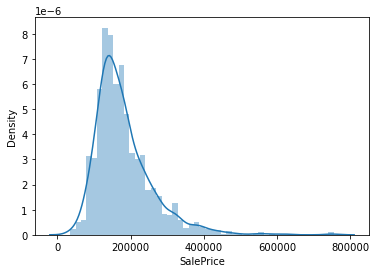

In [6]:
sns.distplot(df['SalePrice'])

<h4>Understanding correlation between features</h4>

Text(0.5, 1.0, 'Correlation Plot')

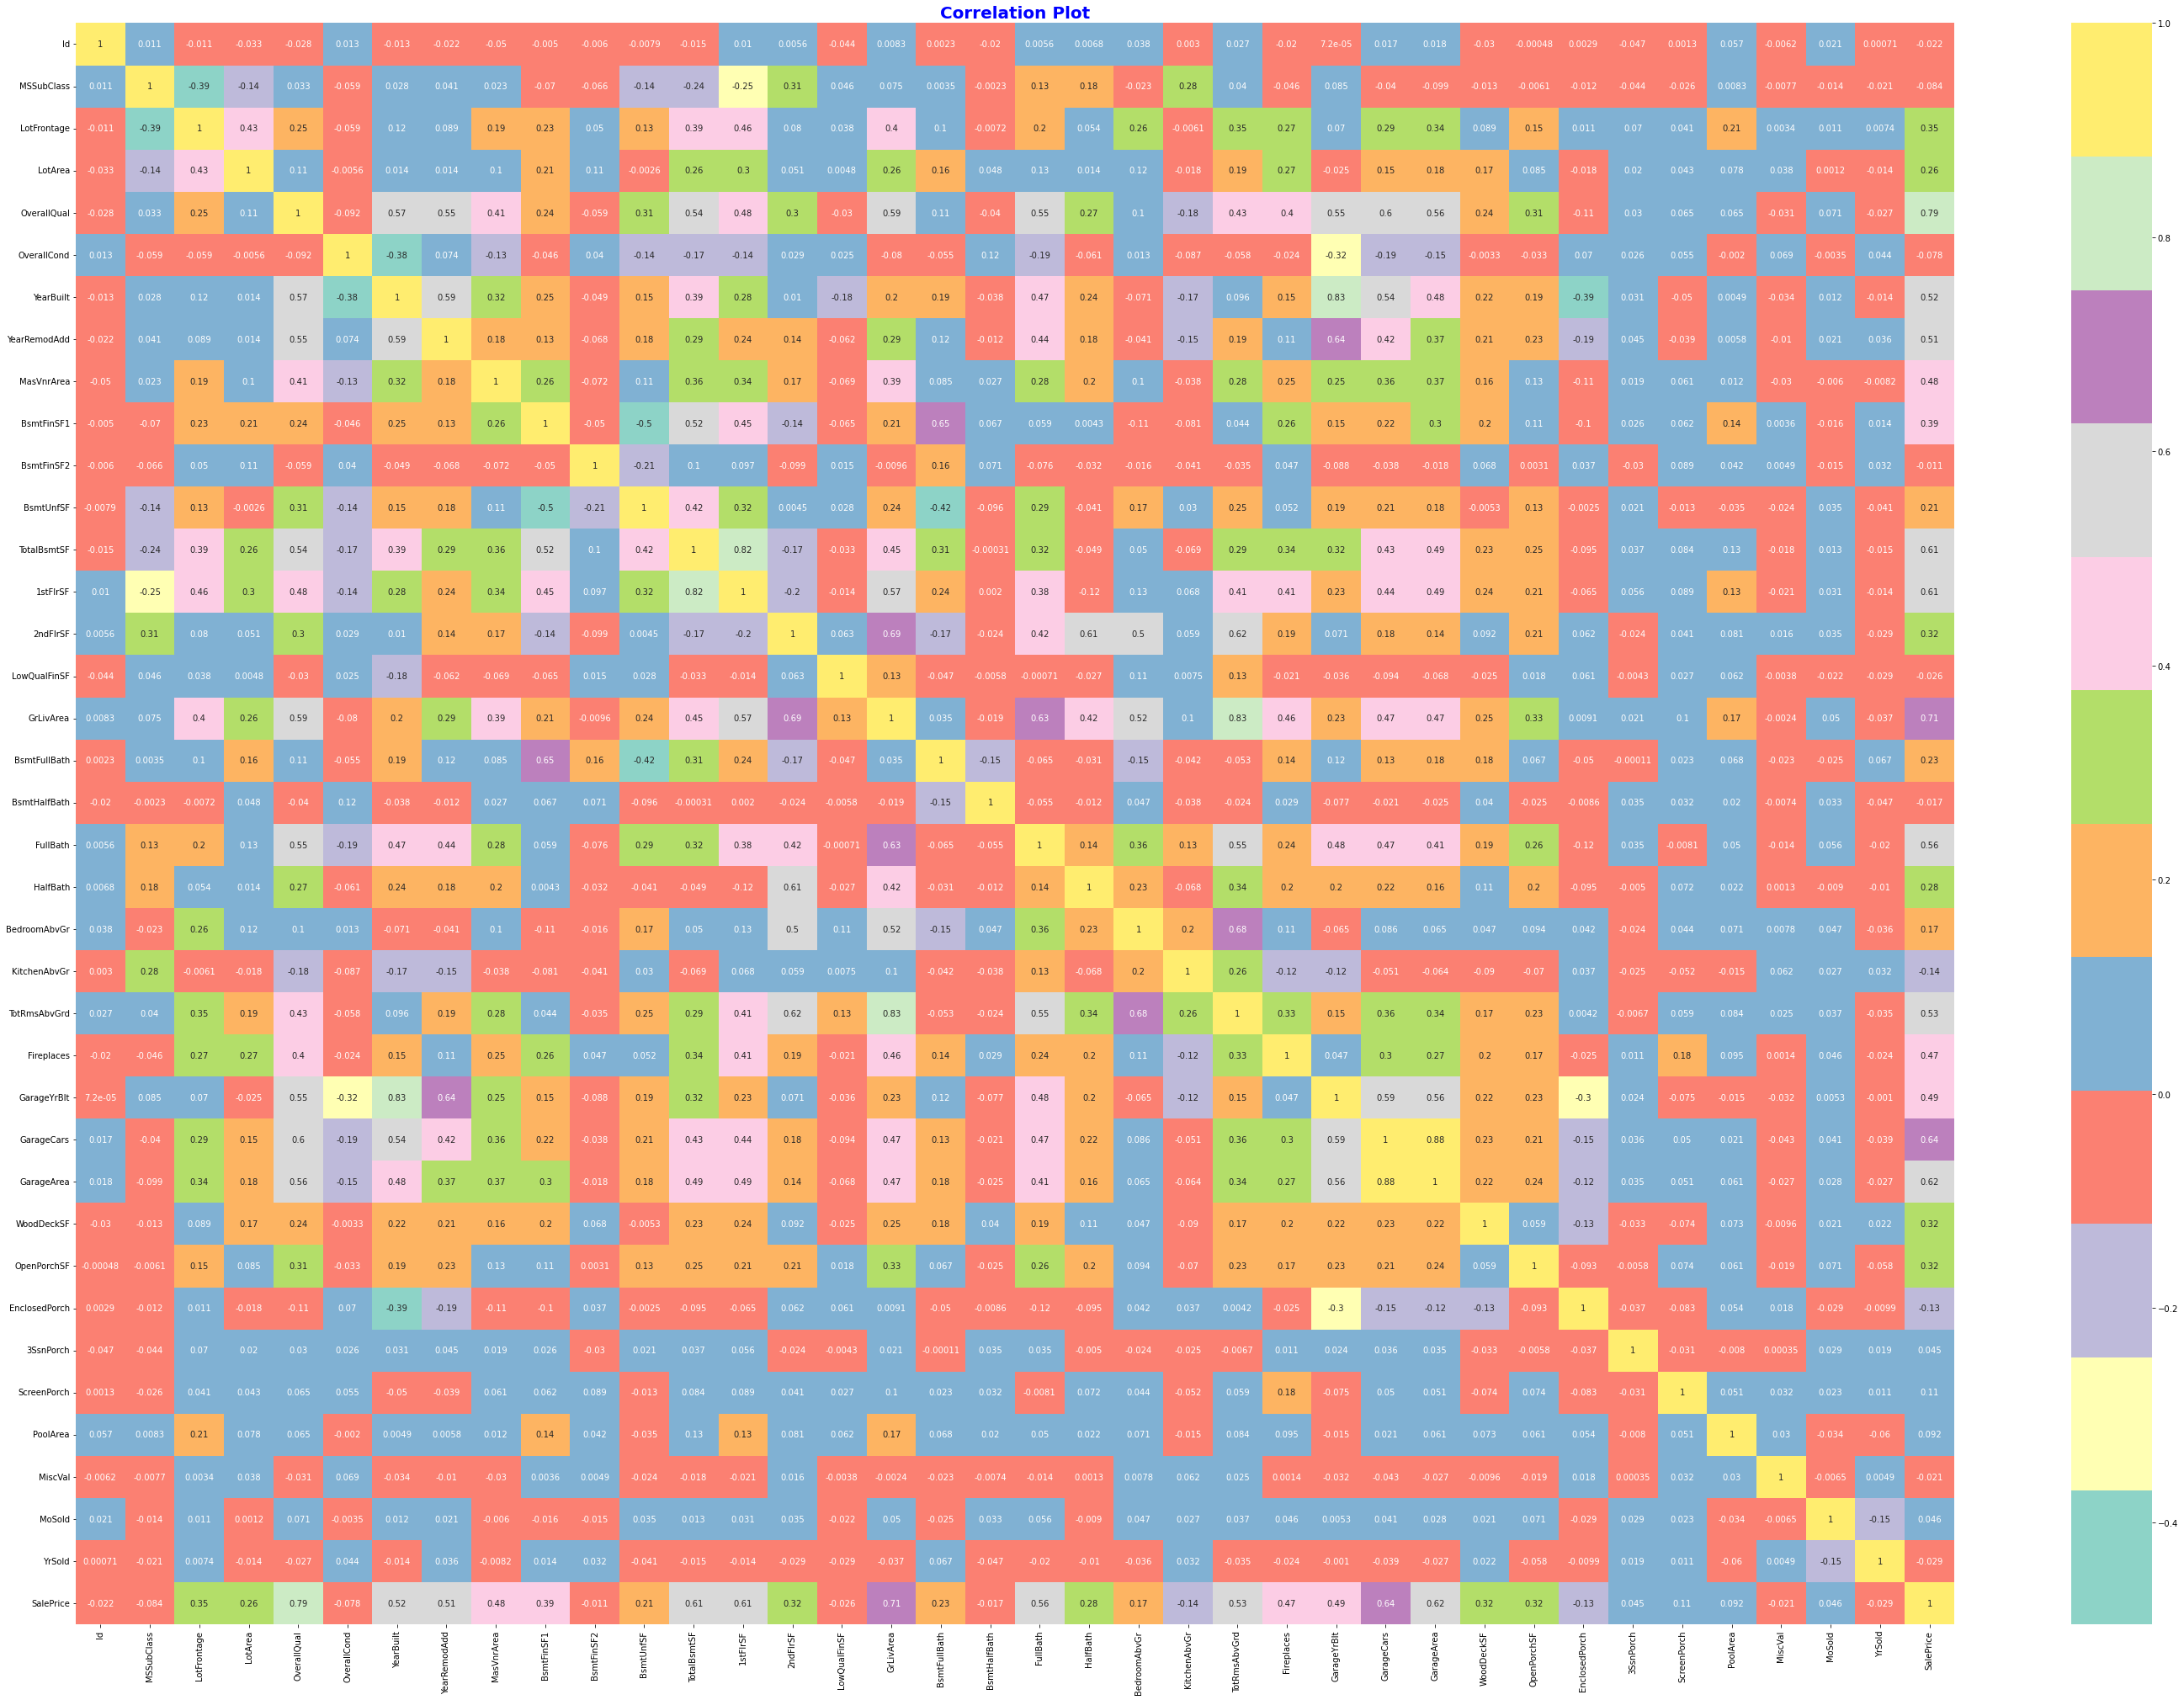

In [7]:
# correlation matrix
corr = df.corr()
corr

plt.figure(figsize=(50,35))
sns.heatmap(corr, annot=True, cmap='Set3')
plt.title("Correlation Plot",fontsize = 20, fontweight = 'bold', color = 'blue')

In [8]:
corr_matrix = df.corr()
corr_matrix['SalePrice'].sort_values(ascending=False).head(15)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
Name: SalePrice, dtype: float64

<h4>Features correlatd with SalePrice</h4>

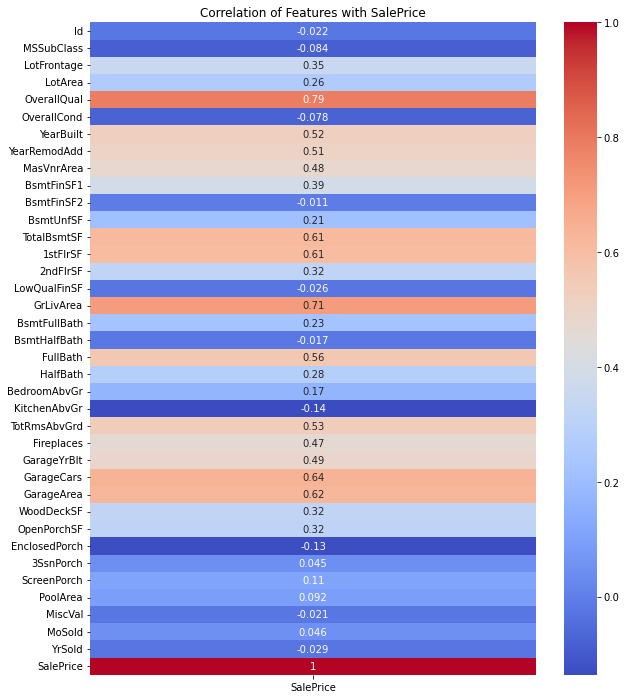

In [9]:
plt.figure(figsize=(10, 12))
sns.heatmap(corr[['SalePrice']], annot=True, cmap='coolwarm')
plt.title('Correlation of Features with SalePrice')
plt.show()

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

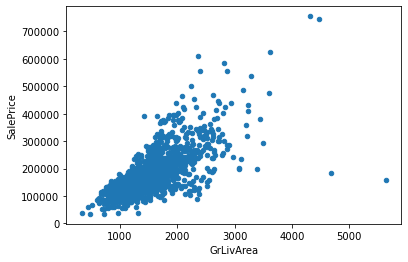

In [10]:
data = pd.concat([df['SalePrice'], df['GrLivArea']], axis=1)
data.plot.scatter(x='GrLivArea', y='SalePrice')

We see some outliers in the above graph

#### Dropping outliers 

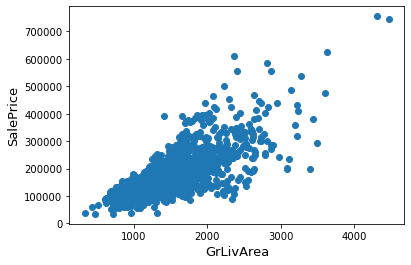

In [11]:
#Deleting outliers
df = df.drop(df[(df['GrLivArea']>4000) & (df['SalePrice']<300000)].index)

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(df['GrLivArea'], df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

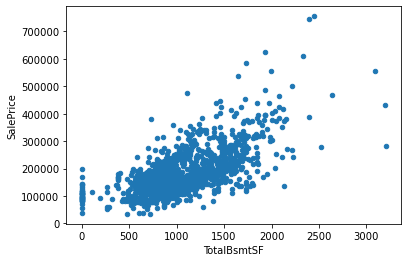

In [12]:
data = pd.concat([df['SalePrice'], df['TotalBsmtSF']], axis=1)
data.plot.scatter(x='TotalBsmtSF', y='SalePrice')

count    1458.000000
mean     1971.218107
std        30.193754
min      1872.000000
25%      1954.000000
50%      1972.500000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64


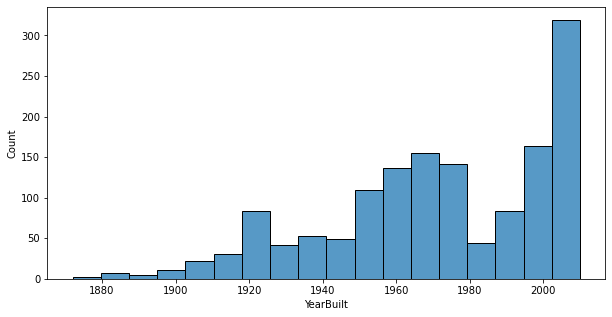

In [13]:
col = 'YearBuilt'
print(df[col].describe())
plt.figure(figsize=(10,5))
sns.histplot(data=df, x=col)
plt.show()

count      1458.000000
mean      10459.936900
std        9859.198156
min        1300.000000
25%        7544.500000
50%        9475.000000
75%       11600.000000
max      215245.000000
Name: LotArea, dtype: float64


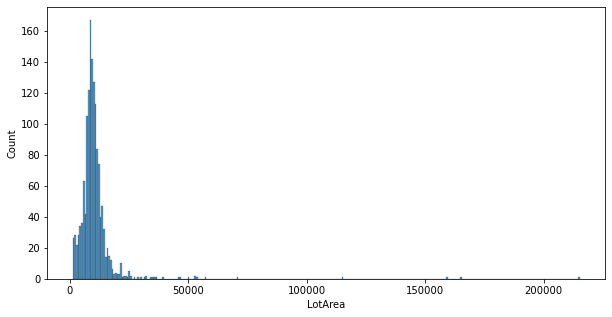

In [14]:
col = 'LotArea'
print(df[col].describe())
plt.figure(figsize=(10,5))
sns.histplot(data=df, x=col)
plt.show()

count    1458.000000
mean     1052.537037
std       414.982320
min         0.000000
25%       795.250000
50%       991.000000
75%      1296.750000
max      3206.000000
Name: TotalBsmtSF, dtype: float64


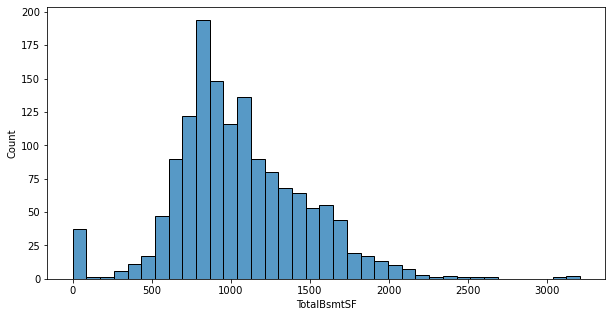

In [15]:
col = 'TotalBsmtSF'
print(df[col].describe())
plt.figure(figsize=(10,5))
sns.histplot(data=df, x=col)
plt.show()

count    1458.000000
mean     1510.465706
std       507.878508
min       334.000000
25%      1128.500000
50%      1461.500000
75%      1776.000000
max      4476.000000
Name: GrLivArea, dtype: float64


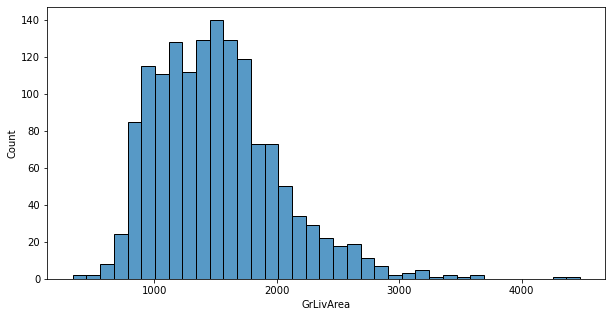

In [16]:
col = 'GrLivArea'
print(df[col].describe())
plt.figure(figsize=(10,5))
sns.histplot(data=df, x=col)
plt.show()

count    1458.000000
mean        1.563786
std         0.549891
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: FullBath, dtype: float64


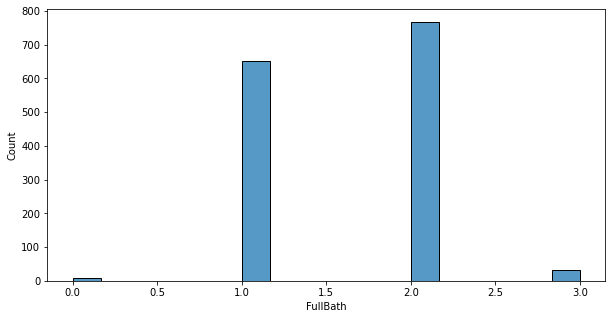

In [17]:
col = 'FullBath'
print(df[col].describe())
plt.figure(figsize=(10,5))
sns.histplot(data=df, x=col)
plt.show()

count    1458.00000
mean        0.38203
std         0.50271
min         0.00000
25%         0.00000
50%         0.00000
75%         1.00000
max         2.00000
Name: HalfBath, dtype: float64


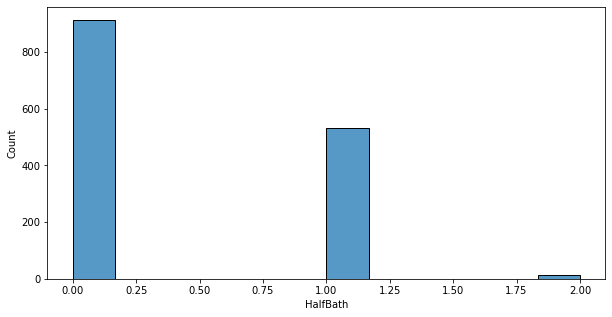

In [18]:
col = 'HalfBath'
print(df[col].describe())
plt.figure(figsize=(10,5))
sns.histplot(data=df, x=col)
plt.show()

count    1458.000000
mean        2.866255
std         0.816323
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         8.000000
Name: BedroomAbvGr, dtype: float64


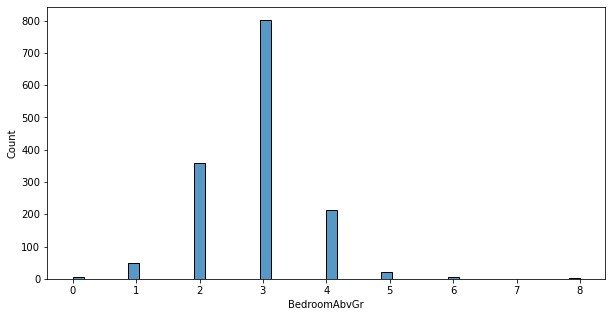

In [19]:
col = 'BedroomAbvGr'
print(df[col].describe())
plt.figure(figsize=(10,5))
sns.histplot(data=df, x=col)
plt.show()

count    1458.000000
mean        1.046639
std         0.220483
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: KitchenAbvGr, dtype: float64


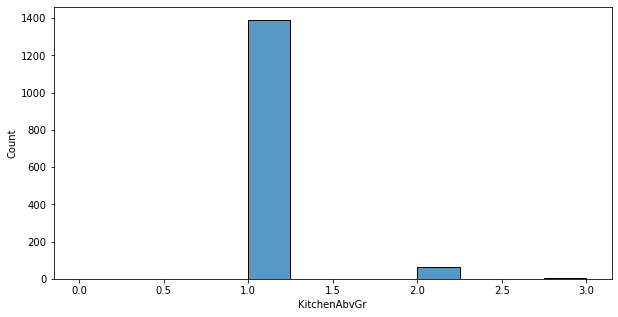

In [20]:
col = 'KitchenAbvGr'
print(df[col].describe())
plt.figure(figsize=(10,5))
sns.histplot(data=df, x=col)
plt.show()

count    1458.000000
mean        0.611111
std         0.641988
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: Fireplaces, dtype: float64


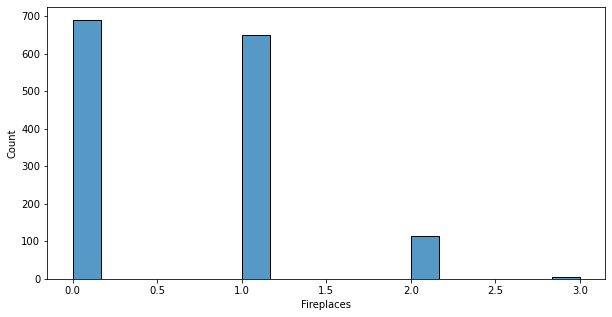

In [21]:
df.groupby('Fireplaces')['Fireplaces'].count()

col = 'Fireplaces'
print(df[col].describe())
plt.figure(figsize=(10,5))
sns.histplot(data=df, x=col)
plt.show()

count    1458.000000
mean        2.433471
std        38.209947
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       738.000000
Name: PoolArea, dtype: float64


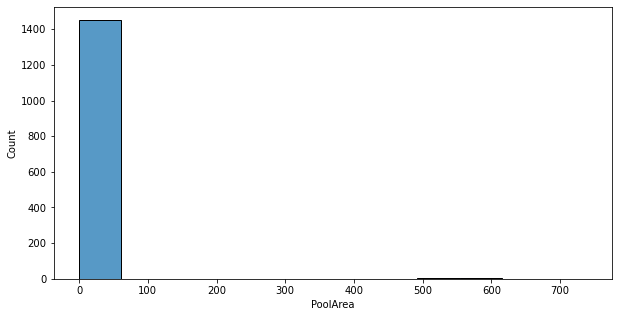

In [22]:
col = 'PoolArea'

df.groupby(col)[col].count()

print(df[col].describe())
plt.figure(figsize=(10,5))
sns.histplot(data=df, x=col)
plt.show()

In [23]:
house_sales_neigh_year = df.groupby(['Neighborhood', 'YrSold']).size().unstack().fillna(0).astype(int)
house_sales_neigh_year

YrSold,2006,2007,2008,2009,2010
Neighborhood,,,,,
Blmngtn,7,2,2,5,1
Blueste,0,0,1,1,0
BrDale,4,3,4,4,1
BrkSide,15,10,14,17,2
ClearCr,6,6,8,4,4
CollgCr,32,30,36,39,13
Crawfor,11,19,9,9,3
Edwards,19,16,25,27,11
Gilbert,24,19,10,20,6


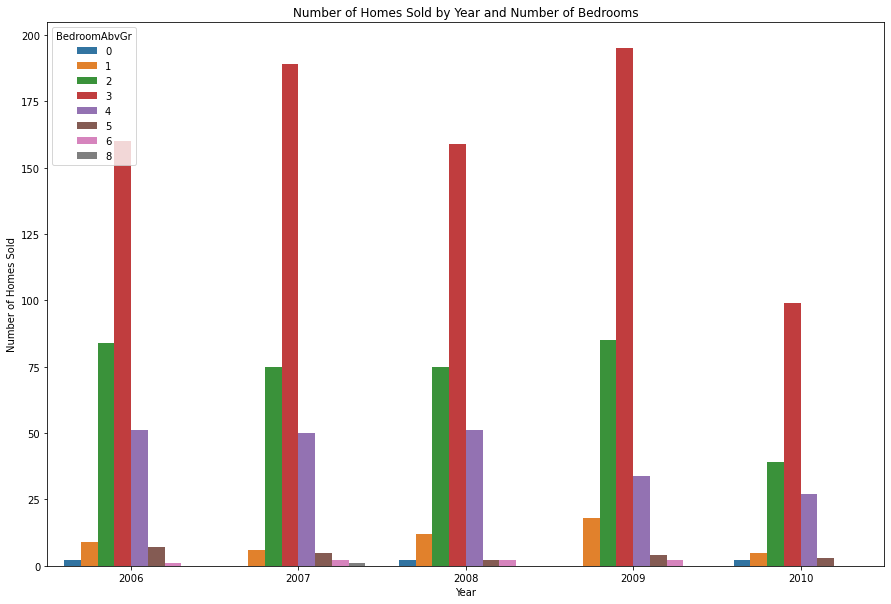

In [24]:
fig, ax = plt.subplots(figsize=(15,10))
sns.countplot(x='YrSold', hue='BedroomAbvGr', data=df)
plt.title('Number of Homes Sold by Year and Number of Bedrooms')
plt.xlabel('Year')
plt.ylabel('Number of Homes Sold')
plt.show()

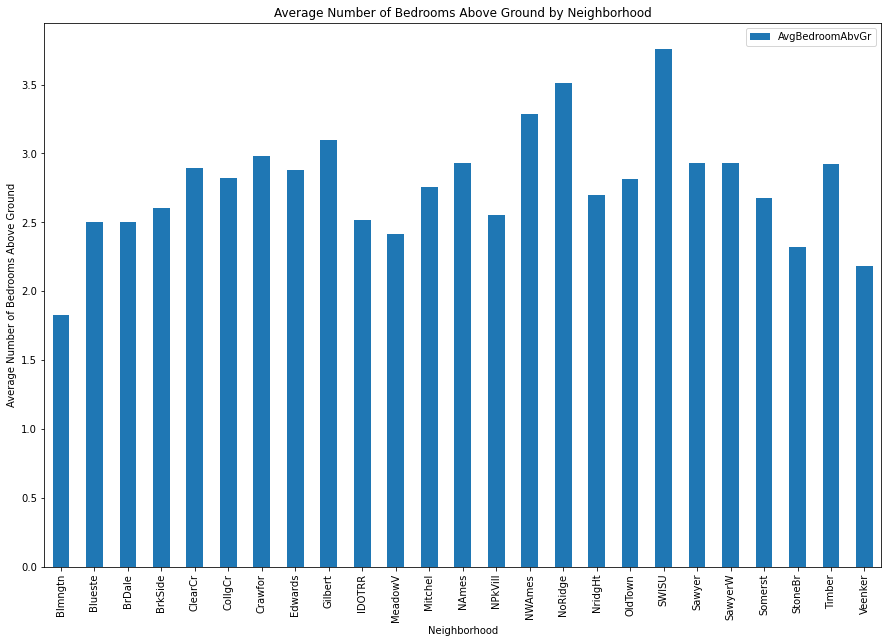

In [25]:
# group the data by Neighborhood and calculate the average number of bedrooms above ground
bedroom_neigh = df.groupby('Neighborhood')['BedroomAbvGr'].mean().reset_index(name='AvgBedroomAbvGr')

# plot the data using a bar plot
fig, ax = plt.subplots(figsize=(15,10))
bedroom_neigh.plot(kind='bar', x='Neighborhood', y='AvgBedroomAbvGr', ax=ax)

# set the plot properties
plt.title('Average Number of Bedrooms Above Ground by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Average Number of Bedrooms Above Ground')

# show the plot
plt.show()

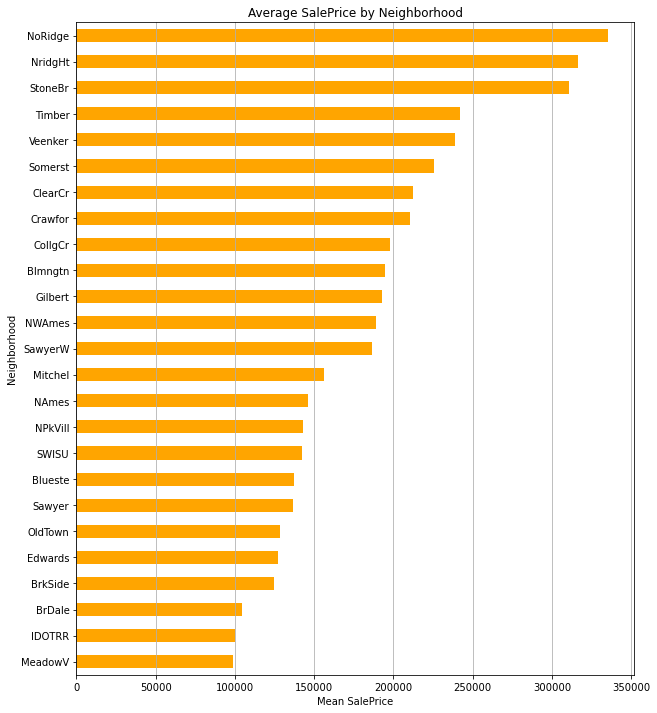

In [26]:
plt.figure(figsize=(10, 12))

# Plot the bar chart
df.groupby('Neighborhood')['SalePrice'].mean().sort_values().plot(kind='barh', color='orange')

# Set the title and axis labels
plt.title('Average SalePrice by Neighborhood')
plt.xlabel('Mean SalePrice')
plt.ylabel('Neighborhood')

# Add a grid
plt.grid(axis='x')

# Show the plot
plt.show()

Text(0.5, 0, 'Neighborhood')

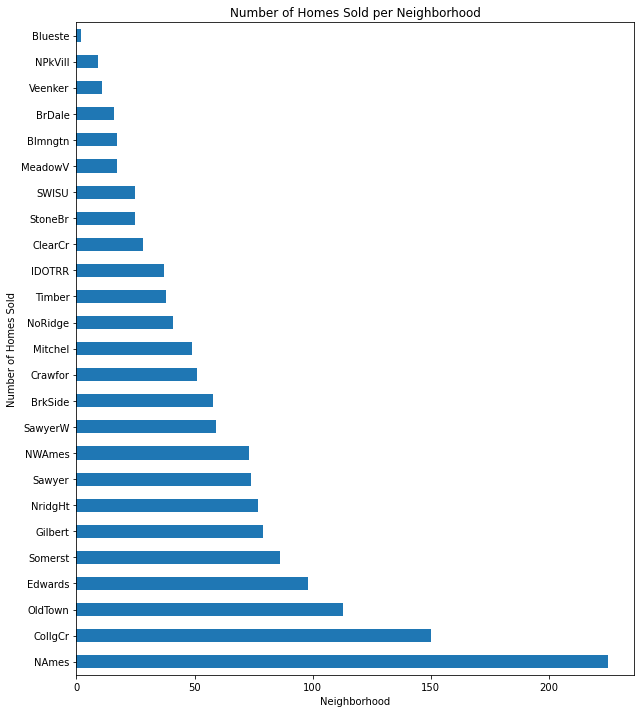

In [27]:
plt.figure(figsize=(10, 12))

plt.ylabel('Number of Homes Sold')
neighborhood_counts = df['Neighborhood'].value_counts()
neighborhood_counts.plot(kind='barh')
plt.title('Number of Homes Sold per Neighborhood')
plt.xlabel('Neighborhood')

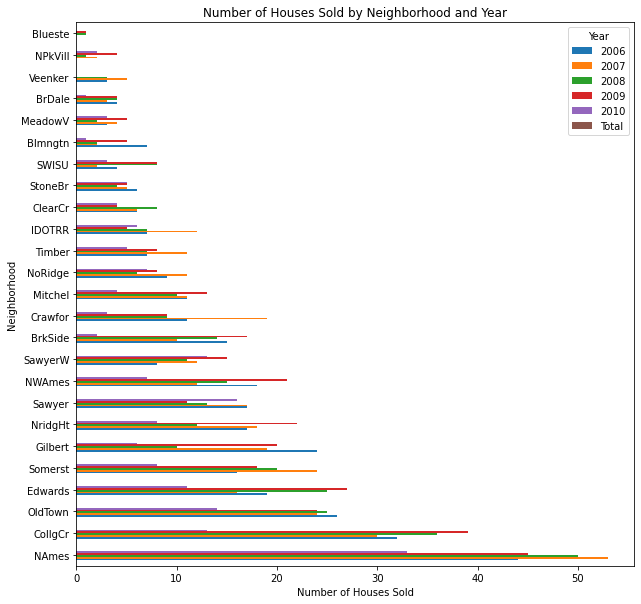

In [28]:
# calculate the total number of houses sold per year and per neighborhood
total_sales_by_neighborhood = house_sales_neigh_year.sum(axis=1) #columns
total_sales_by_year = house_sales_neigh_year.sum(axis=0) #rows

# add the total number of houses sold per year and per neighborhood to the house_sales_neigh_year dataframe
house_sales_neigh_year['Total'] = total_sales_by_neighborhood
house_sales_neigh_year.loc[:, 'Total'] = total_sales_by_year

# sort the neighborhoods by highest sales
total_sales_by_neighborhood = total_sales_by_neighborhood.sort_values(ascending=False)
house_sales_neigh_year = house_sales_neigh_year.loc[total_sales_by_neighborhood.index]

# create a horizontal bar chart with a bar for each year
house_sales_neigh_year = house_sales_neigh_year.plot(kind='barh', figsize=(10, 10))

# set the title, x-axis label, y-axis label, and legend
plt.title('Number of Houses Sold by Neighborhood and Year')
plt.xlabel('Number of Houses Sold')
plt.ylabel('Neighborhood')
plt.legend(title='Year')

# adjust the layout 
#plt.tight_layout()
plt.show()

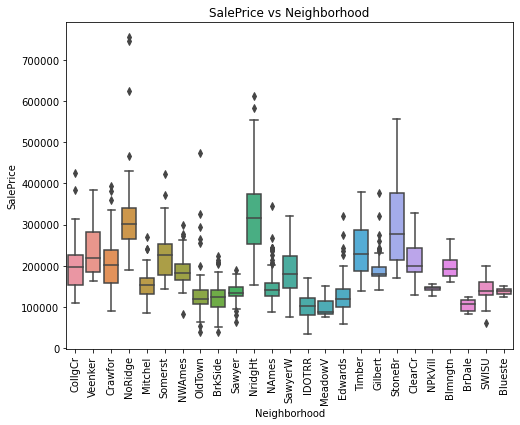

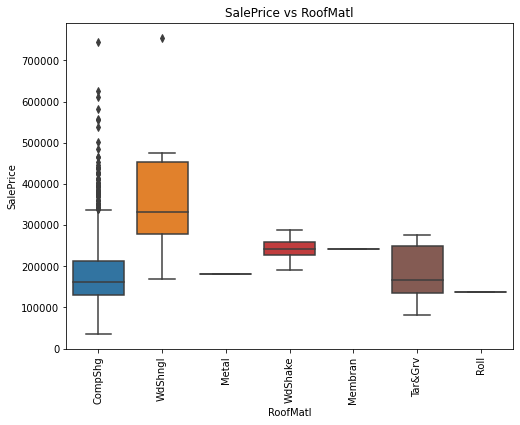

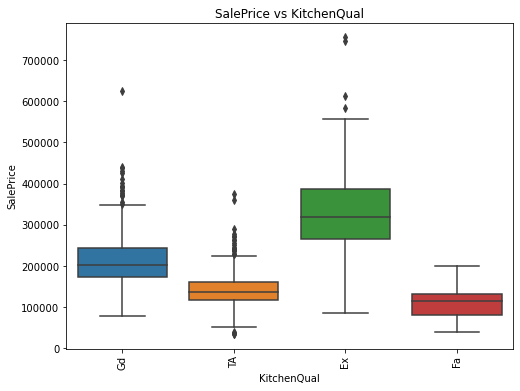

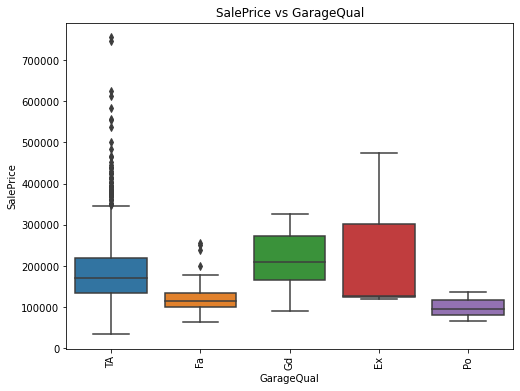

In [29]:
cat_cols = ['Neighborhood','RoofMatl','KitchenQual','GarageQual']
# Plot boxplot or violinplot for each categorical column
for col in cat_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=col, y='SalePrice', data=df)
    plt.xticks(rotation=90)
    plt.title('SalePrice vs {}'.format(col))
    plt.show()

## Feature Engineering

For feature engineering we are adding test and train data so that when we predict the model on test data we don't get size mismatch error

In [30]:
df_test = pd.read_csv('test.csv')
test_ID = df_test['Id']

In [31]:
df.drop("Id", axis = 1, inplace = True)
df_test.drop("Id", axis = 1, inplace = True)

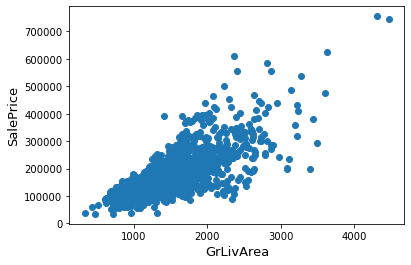

In [32]:
#Deleting outliers
df = df.drop(df[(df['GrLivArea']>4000) & (df['SalePrice']<300000)].index)

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(df['GrLivArea'], df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

In [33]:
#### Combining test and train data

ntrain = df.shape[0]
ntest = df_test.shape[0]

df_y = df.SalePrice.values

df_all = pd.concat((df, df_test)).reset_index(drop=True)
df_all.drop(['SalePrice'], axis=1, inplace=True)

print("all_data size is : {}".format(df_all.shape))

all_data size is : (2917, 79)


In [34]:
df_all.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal


In [35]:
print(df_all.MSSubClass.isna().sum())
type(df_all.MSSubClass[0])

0


numpy.int64

In [36]:
print(df_all.MSZoning.isna().sum())
type(df_all.MSZoning[0])

4


str

In [37]:
df_all.MSZoning.unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH', nan], dtype=object)

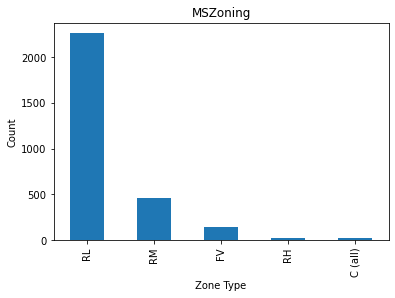

In [38]:
df_all['MSZoning'].value_counts().plot.bar()
plt.title('MSZoning')
plt.xlabel('Zone Type')
plt.ylabel('Count')
plt.show()

In [39]:
df_all['MSZoning'] = df_all['MSZoning'].fillna(df_all['MSZoning'].mode()[0])

In [40]:
print(df_all.LotFrontage.isna().sum())
type(df_all.MSSubClass[0])

486


numpy.int64

count    2431.000000
mean       69.180584
std        22.791719
min        21.000000
25%        59.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64


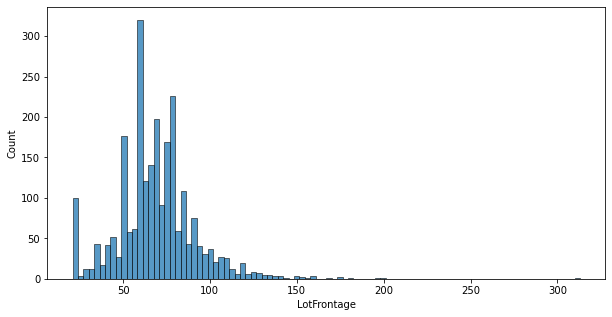

In [41]:
print(df_all['LotFrontage'].describe())

plt.figure(figsize=(10,5))
sns.histplot(data=df_all, x='LotFrontage')
plt.show()

In [42]:
df_all['LotFrontage'] = df_all['LotFrontage'].fillna(df_all['LotFrontage'].median())

In [43]:
df_all.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal


In [44]:
print(df_all.LotArea.isna().sum())
type(df_all.LotArea[0])

0


numpy.int64

In [45]:
print(df_all.Street.isna().sum())
type(df_all.Street[0])

0


str

In [46]:
df_all.Street.unique()

array(['Pave', 'Grvl'], dtype=object)

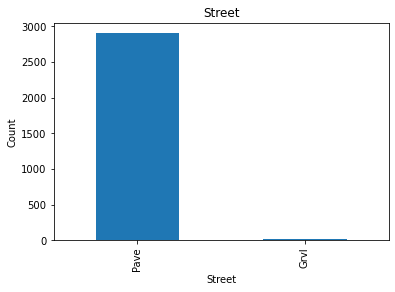

In [47]:
df_all['Street'].value_counts().plot.bar()
plt.title('Street')
plt.xlabel('Street')
plt.ylabel('Count')
plt.show()

In [48]:
print(df_all.Alley.isna().sum())
type(df_all.Alley[0])

2719


float

In [49]:
len(df_all)

2917

In [50]:
df_all.drop("Alley", axis = 1, inplace = True)

In [51]:
df_all.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal


In [52]:
print(df_all.LotShape.isna().sum())
type(df_all.LotShape[0])

0


str

In [53]:
df_all.LotShape.unique()

array(['Reg', 'IR1', 'IR2', 'IR3'], dtype=object)

In [54]:
print(df_all.LandContour.isna().sum())
type(df_all.LandContour[0])

0


str

In [55]:
df_all.LandContour.unique()

array(['Lvl', 'Bnk', 'Low', 'HLS'], dtype=object)

In [56]:
print(df_all.Utilities.isna().sum())
type(df_all.Utilities[0])

2


str

In [57]:
df_all['Utilities'] = df_all['Utilities'].fillna(df_all['Utilities'].mode()[0])

In [58]:
df_all.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal


In [59]:
print(df_all.LotConfig.isna().sum())
type(df_all.LotConfig[0])

0


str

In [60]:
df_all.LotConfig.unique()

array(['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3'], dtype=object)

In [61]:
print(df_all.LandSlope.isna().sum())
type(df_all.LandSlope[0])

df_all.LandSlope.unique()

0


array(['Gtl', 'Mod', 'Sev'], dtype=object)

In [62]:
print(df_all.Neighborhood.isna().sum())
type(df_all.Neighborhood[0])

df_all.Neighborhood.unique()

0


array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

In [63]:
print(df_all.Condition1.isna().sum())
type(df_all.Condition1[0])

df_all.Condition1.unique()

0


array(['Norm', 'Feedr', 'PosN', 'Artery', 'RRAe', 'RRNn', 'RRAn', 'PosA',
       'RRNe'], dtype=object)

In [64]:
df_all.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal


In [65]:
print(df_all.BldgType.isna().sum())
type(df_all.BldgType[0])

df_all.BldgType.unique()

0


array(['1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs'], dtype=object)

In [66]:
print(df_all.HouseStyle.isna().sum())
type(df_all.HouseStyle[0])

df_all.HouseStyle.unique()

0


array(['2Story', '1Story', '1.5Fin', '1.5Unf', 'SFoyer', 'SLvl', '2.5Unf',
       '2.5Fin'], dtype=object)

In [67]:
print(df_all.OverallQual.isna().sum())
print(type(df_all.OverallQual[0]))

df_all.OverallQual.unique()

0
<class 'numpy.int64'>


array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

In [68]:
print(df_all.OverallCond.isna().sum())
print(type(df_all.OverallCond[0]))

df_all.OverallCond.unique()

0
<class 'numpy.int64'>


array([5, 8, 6, 7, 4, 2, 3, 9, 1], dtype=int64)

In [69]:
print(df_all.YearBuilt.isna().sum())
print(type(df_all.YearBuilt[0]))

df_all.YearBuilt.unique()

0
<class 'numpy.int64'>


array([2003, 1976, 2001, 1915, 2000, 1993, 2004, 1973, 1931, 1939, 1965,
       2005, 1962, 2006, 1960, 1929, 1970, 1967, 1958, 1930, 2002, 1968,
       2007, 1951, 1957, 1927, 1920, 1966, 1959, 1994, 1954, 1953, 1955,
       1983, 1975, 1997, 1934, 1963, 1981, 1964, 1999, 1972, 1921, 1945,
       1982, 1998, 1956, 1948, 1910, 1995, 1991, 2009, 1950, 1961, 1977,
       1985, 1979, 1885, 1919, 1990, 1969, 1935, 1988, 1971, 1952, 1936,
       1923, 1924, 1984, 1926, 1940, 1941, 1987, 1986, 2008, 1908, 1892,
       1916, 1932, 1918, 1912, 1947, 1925, 1900, 1980, 1989, 1992, 1949,
       1880, 1928, 1978, 1922, 1996, 2010, 1946, 1913, 1937, 1942, 1938,
       1974, 1893, 1914, 1906, 1890, 1898, 1904, 1882, 1875, 1911, 1917,
       1872, 1905, 1907, 1896, 1902, 1895, 1879, 1901], dtype=int64)

In [70]:
print(df_all.YearRemodAdd.isna().sum())
print(type(df_all.YearRemodAdd[0]))

df_all.YearRemodAdd.unique()

0
<class 'numpy.int64'>


array([2003, 1976, 2002, 1970, 2000, 1995, 2005, 1973, 1950, 1965, 2006,
       1962, 2007, 1960, 2001, 1967, 2004, 2008, 1997, 1959, 1990, 1955,
       1983, 1980, 1966, 1963, 1987, 1964, 1972, 1996, 1998, 1989, 1953,
       1956, 1968, 1981, 1992, 2009, 1982, 1961, 1993, 1999, 1985, 1979,
       1977, 1969, 1958, 1991, 1971, 1952, 1975, 2010, 1984, 1986, 1994,
       1988, 1954, 1957, 1951, 1978, 1974], dtype=int64)

In [71]:
df_all['YearRemodAdd'].dtype

dtype('int64')

In [72]:
df_all.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal


In [73]:
print(df_all.RoofStyle.isna().sum())
print(type(df_all.RoofStyle[0]))

df_all.RoofStyle.unique()

0
<class 'str'>


array(['Gable', 'Hip', 'Gambrel', 'Mansard', 'Flat', 'Shed'], dtype=object)

In [74]:
print(df_all.RoofMatl.isna().sum())
print(type(df_all.RoofMatl[0]))

df_all.RoofMatl.unique()

0
<class 'str'>


array(['CompShg', 'WdShngl', 'Metal', 'WdShake', 'Membran', 'Tar&Grv',
       'Roll'], dtype=object)

In [75]:
print(df_all.Exterior1st.isna().sum())
print(type(df_all.Exterior1st[0]))

df_all.Exterior1st.unique()

1
<class 'str'>


array(['VinylSd', 'MetalSd', 'Wd Sdng', 'HdBoard', 'BrkFace', 'WdShing',
       'CemntBd', 'Plywood', 'AsbShng', 'Stucco', 'BrkComm', 'AsphShn',
       'Stone', 'ImStucc', 'CBlock', nan], dtype=object)

In [76]:
df_all['Exterior1st'] = df_all['Exterior1st'].fillna(df_all['Exterior1st'].mode()[0])

In [77]:
print(df_all.Exterior2nd.isna().sum())
print(type(df_all.Exterior2nd[0]))

df_all.Exterior2nd.unique()

1
<class 'str'>


array(['VinylSd', 'MetalSd', 'Wd Shng', 'HdBoard', 'Plywood', 'Wd Sdng',
       'CmentBd', 'BrkFace', 'Stucco', 'AsbShng', 'Brk Cmn', 'ImStucc',
       'AsphShn', 'Stone', 'Other', 'CBlock', nan], dtype=object)

In [78]:
df_all['Exterior2nd'] = df_all['Exterior2nd'].fillna(df_all['Exterior2nd'].mode()[0])

In [79]:
df_all.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal


In [80]:
print(df_all.MasVnrType.isna().sum())
print(type(df_all.MasVnrType[0]))

df_all.MasVnrType.unique()

24
<class 'str'>


array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

In [81]:
df_all["MasVnrType"] = df_all["MasVnrType"].fillna("None")

In [82]:
print(df_all.MasVnrArea.isna().sum())
print(type(df_all.MasVnrArea[0]))


23
<class 'numpy.float64'>


count    2894.000000
mean      101.733587
std       178.510291
min         0.000000
25%         0.000000
50%         0.000000
75%       164.000000
max      1600.000000
Name: MasVnrArea, dtype: float64


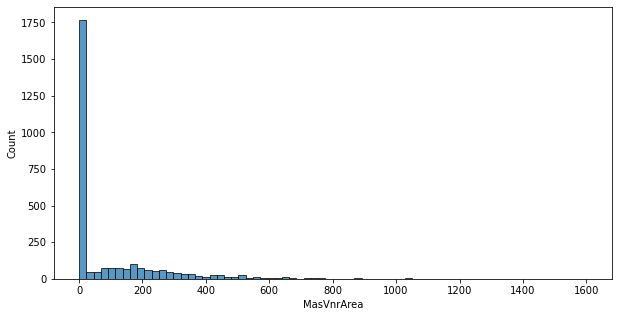

In [83]:
print(df_all['MasVnrArea'].describe())

plt.figure(figsize=(10,5))
sns.histplot(data=df_all, x='MasVnrArea')
plt.show()

In [84]:
df_all['MasVnrArea'] = df_all['MasVnrArea'].fillna(df_all['MasVnrArea'].median())

In [85]:
df_all.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal


In [86]:
print(df_all.ExterQual.isna().sum())
print(type(df_all.ExterQual[0]))

df_all.ExterQual.unique()

0
<class 'str'>


array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [87]:
#perform ordinal encoding for exterior qual feature
exterior_qual_dict = {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0}
# perform ordinal encoding using the map function
df_all['ExterQual'] = df_all['ExterQual'].map(exterior_qual_dict)

In [88]:
print(df_all.ExterCond.isna().sum())
print(type(df_all.ExterCond[0]))

df_all.ExterCond.unique()

0
<class 'str'>


array(['TA', 'Gd', 'Fa', 'Po', 'Ex'], dtype=object)

In [89]:
#perform ordinal encoding for exterior qual feature
exterior_cond_dict = {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0}
# perform ordinal encoding using the map function
df_all['ExterCond'] = df_all['ExterCond'].map(exterior_cond_dict)

In [90]:
print(df_all.Foundation.isna().sum())
print(type(df_all.Foundation[0]))

df_all.Foundation.unique()

0
<class 'str'>


array(['PConc', 'CBlock', 'BrkTil', 'Wood', 'Slab', 'Stone'], dtype=object)

In [91]:
print(df_all.BsmtQual.isna().sum())
print(type(df_all.BsmtQual[0]))

df_all.BsmtQual.unique()

81
<class 'str'>


array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [92]:
# basement height
bsmt_qual_dict = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}
# perform ordinal encoding using the map function
df_all['BsmtQual'] = df_all['BsmtQual'].map(bsmt_qual_dict).fillna(0)

In [93]:
df_all.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,3,2,PConc,4.0,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,2,2,CBlock,4.0,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal


In [94]:
print(df_all.BsmtCond.isna().sum())
print(type(df_all.BsmtCond[0]))

df_all.BsmtCond.unique()

82
<class 'str'>


array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

In [95]:
# basement height
bsmt_cond_dict = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}
# perform ordinal encoding using the map function
df_all['BsmtCond'] = df_all['BsmtCond'].map(bsmt_cond_dict).fillna(0)

In [96]:
print(df_all.BsmtExposure.isna().sum())
print(type(df_all.BsmtExposure[0]))

df_all.BsmtExposure.unique()

82
<class 'str'>


array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

In [97]:
bsmt_exp_dict = {'Gd': 5, 'Av': 4, 'TA': 3, 'Mn': 2, 'No': 1, 'NA': 0}
df_all['BsmtExposure'] = df_all['BsmtExposure'].map(bsmt_exp_dict).fillna(0)

In [98]:
print(df_all.BsmtFinType1.isna().sum())
print(type(df_all.BsmtFinType1[0]))

df_all.BsmtFinType1.unique()

79
<class 'str'>


array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=object)

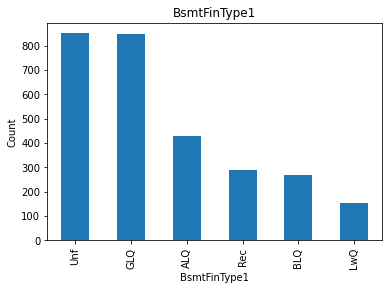

In [99]:
df_all['BsmtFinType1'].value_counts().plot.bar()
plt.title('BsmtFinType1')
plt.xlabel('BsmtFinType1')
plt.ylabel('Count')
plt.show()

In [100]:
bsmt_fin_dict = {'NA': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}
df_all['BsmtFinType1'] = df_all['BsmtFinType1'].map(bsmt_fin_dict).fillna(0)

In [101]:
df_all.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,3,2,PConc,4.0,3.0,1.0,6.0,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,2,2,CBlock,4.0,3.0,5.0,5.0,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal


In [102]:
print(df_all.BsmtFinSF1.isna().sum())
print(type(df_all.BsmtFinSF1[0]))



1
<class 'numpy.float64'>


count    2916.000000
mean      439.015432
std       444.182329
min         0.000000
25%         0.000000
50%       368.000000
75%       733.000000
max      4010.000000
Name: BsmtFinSF1, dtype: float64


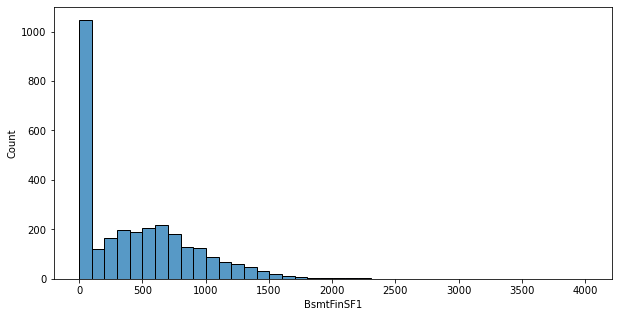

In [103]:
print(df_all['BsmtFinSF1'].describe())

plt.figure(figsize=(10,5))
sns.histplot(data=df_all, x='BsmtFinSF1')
plt.show()

In [104]:
df_all['BsmtFinSF1'] = df_all['BsmtFinSF1'].fillna(df_all['BsmtFinSF1'].median())

In [105]:
df_all.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,3,2,PConc,4.0,3.0,1.0,6.0,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,2,2,CBlock,4.0,3.0,5.0,5.0,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal


In [106]:
print(df_all.BsmtFinType2.isna().sum())
print(type(df_all.BsmtFinType2[0]))

df_all.BsmtFinType2.unique()

80
<class 'str'>


array(['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

In [107]:
bsmt_fin_dict = {'NA': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}
df_all['BsmtFinType2'] = df_all['BsmtFinType2'].map(bsmt_fin_dict).fillna(0)

In [108]:
print(df_all.BsmtFinSF2.isna().sum())
print(type(df_all.BsmtFinSF2[0]))

df_all.BsmtFinSF2.unique()

1
<class 'numpy.float64'>


array([   0.,   32.,  668.,  486.,   93.,  491.,  506.,  712.,  362.,
         41.,  169.,  869.,  150.,  670.,   28., 1080.,  181.,  768.,
        215.,  374.,  208.,  441.,  184.,  279.,  306.,  180.,  580.,
        690.,  692.,  228.,  125., 1063.,  620.,  175.,  820., 1474.,
        264.,  479.,  147.,  232.,  380.,  544.,  294.,  258.,  121.,
        391.,  531.,  344.,  539.,  713.,  210.,  311., 1120.,  165.,
        532.,   96.,  495.,  174., 1127.,  139.,  202.,  645.,  123.,
        551.,  219.,  606.,  612.,  480.,  182.,  132.,  336.,  468.,
        287.,   35.,  499.,  723.,  119.,   40.,  117.,  239.,   80.,
        472.,   64., 1057.,  127.,  630.,  128.,  377.,  764.,  345.,
       1085.,  435.,  823.,  500.,  290.,  324.,  634.,  411.,  841.,
       1061.,  466.,  396.,  354.,  149.,  193.,  273.,  465.,  400.,
        682.,  557.,  230.,  106.,  791.,  240.,  547.,  469.,  177.,
        108.,  600.,  492.,  211.,  168., 1031.,  438.,  375.,  144.,
         81.,  906.,

In [109]:
df_all['BsmtFinSF2'] = df_all['BsmtFinSF2'].fillna(df_all['BsmtFinSF2'].median())

In [110]:
print(df_all.BsmtUnfSF.isna().sum())
print(type(df_all.BsmtUnfSF[0]))

df_all.BsmtUnfSF.unique()

1
<class 'numpy.float64'>


array([ 150.,  284.,  434., ...,  129.,   45., 1503.])

In [111]:
df_all['BsmtUnfSF'] = df_all['BsmtUnfSF'].fillna(df_all['BsmtUnfSF'].median())

In [112]:
print(df_all.TotalBsmtSF.isna().sum())
print(type(df_all.TotalBsmtSF[0]))

df_all.TotalBsmtSF.unique()

1
<class 'numpy.float64'>


array([ 856., 1262.,  920., ...,  498.,  432., 1381.])

In [113]:
df_all['TotalBsmtSF'] = df_all['TotalBsmtSF'].fillna(df_all['TotalBsmtSF'].median())

In [114]:
df_all.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,3,2,PConc,4.0,3.0,1.0,6.0,706.0,1.0,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,2,2,CBlock,4.0,3.0,5.0,5.0,978.0,1.0,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal


In [115]:
print(df_all.Heating.isna().sum())
print(type(df_all.Heating[0]))

df_all.Heating.unique()

0
<class 'str'>


array(['GasA', 'GasW', 'Grav', 'Wall', 'OthW', 'Floor'], dtype=object)

In [116]:
print(df_all.HeatingQC.isna().sum())
print(type(df_all.HeatingQC[0]))

df_all.HeatingQC.unique()

0
<class 'str'>


array(['Ex', 'Gd', 'TA', 'Fa', 'Po'], dtype=object)

In [117]:
heatingQC_map = {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0}
# Perform ordinal encoding
df_all['HeatingQC'] = df_all['HeatingQC'].map(heatingQC_map)

In [118]:
df_all.head(1)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,3,2,PConc,4.0,3.0,1.0,6.0,706.0,1.0,0.0,150.0,856.0,GasA,4,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal


In [119]:
print(df_all.CentralAir.isna().sum())
print(type(df_all.CentralAir[0]))

df_all.CentralAir.unique()

0
<class 'str'>


array(['Y', 'N'], dtype=object)

In [120]:
#air condn
air_cond = {'N': 0, 'Y': 1}
df_all['CentralAir'] = df_all['CentralAir'].map(air_cond)

In [121]:
print(df_all.Electrical.isna().sum())
print(type(df_all.Electrical[0]))

df_all.Electrical.unique()

1
<class 'str'>


array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

In [122]:
df_all['Electrical'] = df_all['Electrical'].fillna(df_all['Electrical'].mode()[0])

In [123]:
df_all.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,3,2,PConc,4.0,3.0,1.0,6.0,706.0,1.0,0.0,150.0,856.0,GasA,4,1,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,2,2,CBlock,4.0,3.0,5.0,5.0,978.0,1.0,0.0,284.0,1262.0,GasA,4,1,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal


In [124]:
print(df_all['1stFlrSF'].isna().sum())
print(type(df_all['1stFlrSF'][0]))

df_all['1stFlrSF'].unique()

0
<class 'numpy.int64'>


array([ 856, 1262,  920, ..., 1778, 1650, 1960], dtype=int64)

In [125]:
print(df_all['2ndFlrSF'].isna().sum())
print(type(df_all['2ndFlrSF'][0]))

0
<class 'numpy.int64'>


In [126]:
print(df_all['LowQualFinSF'].isna().sum())
print(type(df_all['LowQualFinSF'][0]))

df_all['LowQualFinSF'].unique()

0
<class 'numpy.int64'>


array([   0,  360,  513,  234,  528,  572,  144,  392,  371,  390,  420,
        473,  156,  515,   80,   53,  232,  481,  120,  514,  397,  479,
        205,  384,  362, 1064,  431,  436,  259,  312,  108,  697,  512,
        114,  140,  450], dtype=int64)

In [127]:
print(df_all['GrLivArea'].isna().sum())
print(type(df_all['GrLivArea'][0]))

df_all['GrLivArea'].unique()

0
<class 'numpy.int64'>


array([1710, 1262, 1786, ..., 2315,  641, 1778], dtype=int64)

In [128]:
df_all.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,3,2,PConc,4.0,3.0,1.0,6.0,706.0,1.0,0.0,150.0,856.0,GasA,4,1,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,2,2,CBlock,4.0,3.0,5.0,5.0,978.0,1.0,0.0,284.0,1262.0,GasA,4,1,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal


In [129]:
print(df_all['BsmtFullBath'].isna().sum())
print(type(df_all['BsmtFullBath'][0]))

df_all['BsmtFullBath'].unique()

2
<class 'numpy.float64'>


array([ 1.,  0.,  2.,  3., nan])

In [130]:
df_all["BsmtFullBath"] = df_all["BsmtFullBath"].fillna(0)

In [131]:
print(df_all['BsmtHalfBath'].isna().sum())
print(type(df_all['BsmtHalfBath'][0]))

df_all['BsmtHalfBath'].unique()

2
<class 'numpy.float64'>


array([ 0.,  1.,  2., nan])

In [132]:
df_all["BsmtHalfBath"] = df_all["BsmtHalfBath"].fillna(0)

In [133]:
print(df_all['FullBath'].isna().sum())
print(type(df_all['FullBath'][0]))

df_all['FullBath'].unique()

0
<class 'numpy.int64'>


array([2, 1, 3, 0, 4], dtype=int64)

In [134]:
print(df_all['HalfBath'].isna().sum())
print(type(df_all['HalfBath'][0]))

df_all['HalfBath'].unique()

0
<class 'numpy.int64'>


array([1, 0, 2], dtype=int64)

In [135]:
df_all.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,3,2,PConc,4.0,3.0,1.0,6.0,706.0,1.0,0.0,150.0,856.0,GasA,4,1,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,2,2,CBlock,4.0,3.0,5.0,5.0,978.0,1.0,0.0,284.0,1262.0,GasA,4,1,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal


In [136]:
print(df_all['BedroomAbvGr'].isna().sum())
print(type(df_all['BedroomAbvGr'][0]))

df_all['BedroomAbvGr'].unique()

0
<class 'numpy.int64'>


array([3, 4, 1, 2, 0, 5, 6, 8], dtype=int64)

In [137]:
print(df_all['KitchenAbvGr'].isna().sum())
print(type(df_all['KitchenAbvGr'][0]))

df_all['KitchenAbvGr'].unique()

0
<class 'numpy.int64'>


array([1, 2, 3, 0], dtype=int64)

In [138]:
print(df_all['KitchenQual'].isna().sum())
print(type(df_all['KitchenQual'][0]))

df_all['KitchenQual'].unique()

1
<class 'str'>


array(['Gd', 'TA', 'Ex', 'Fa', nan], dtype=object)

In [139]:
df_all['KitchenQual'] = df_all['KitchenQual'].fillna(df_all['KitchenQual'].mode()[0])

In [140]:
# Define mapping dictionary
kitchenqual_map = {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0}
# Perform ordinal encoding
df_all['KitchenQual'] = df_all['KitchenQual'].map(kitchenqual_map)

In [141]:
df_all.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,3,2,PConc,4.0,3.0,1.0,6.0,706.0,1.0,0.0,150.0,856.0,GasA,4,1,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,3,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,2,2,CBlock,4.0,3.0,5.0,5.0,978.0,1.0,0.0,284.0,1262.0,GasA,4,1,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,2,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal


In [142]:
print(df_all['TotRmsAbvGrd'].isna().sum())
print(type(df_all['TotRmsAbvGrd'][0]))

df_all['TotRmsAbvGrd'].unique()

0
<class 'numpy.int64'>


array([ 8,  6,  7,  9,  5, 11,  4, 10, 12,  3,  2, 14, 13, 15],
      dtype=int64)

In [143]:
print(df_all['Functional'].isna().sum())
print(type(df_all['Functional'][0]))

df_all['Functional'].unique()

2
<class 'str'>


array(['Typ', 'Min1', 'Maj1', 'Min2', 'Mod', 'Maj2', 'Sev', nan],
      dtype=object)

In [144]:
df_all['Functional'] = df_all['Functional'].fillna("Typ")

In [145]:
print(df_all['Fireplaces'].isna().sum())
print(type(df_all['Fireplaces'][0]))

df_all['Fireplaces'].unique()

0
<class 'numpy.int64'>


array([0, 1, 2, 3, 4], dtype=int64)

In [146]:
print(df_all['FireplaceQu'].isna().sum())
print(type(df_all['FireplaceQu'][0]))

df_all['FireplaceQu'].unique()

1420
<class 'float'>


array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [147]:
print(df['FireplaceQu'].isna().sum())

690


In [148]:
df_all['FireplaceQu'] = df_all['FireplaceQu'].fillna(df_all['FireplaceQu'].mode()[0])

In [149]:
#fireplace quality
mapping = {'NA': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
# Apply ordinal encoding
df_all['FireplaceQu'] = df_all['FireplaceQu'].map(mapping).fillna(0)

In [150]:
print(df_all['GarageType'].isna().sum())
print(type(df_all['GarageType'][0]))

df_all['GarageType'].unique()

157
<class 'str'>


array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

In [151]:
df_all['GarageType'] = df_all['GarageType'].fillna(df_all['GarageType'].mode()[0])

In [152]:
df_all.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,3,2,PConc,4.0,3.0,1.0,6.0,706.0,1.0,0.0,150.0,856.0,GasA,4,1,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,3,8,Typ,0,4,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,2,2,CBlock,4.0,3.0,5.0,5.0,978.0,1.0,0.0,284.0,1262.0,GasA,4,1,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,2,6,Typ,1,3,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal


In [153]:
print(df_all['GarageYrBlt'].isna().sum())
print(type(df_all['GarageYrBlt'][0]))

159
<class 'numpy.float64'>


In [154]:
df_all['GarageYrBlt'] = df_all['GarageYrBlt'].fillna(df_all['YearBuilt'])

In [155]:
from sklearn.preprocessing import LabelEncoder
cols = ('YearRemodAdd','YearBuilt', 'GarageYrBlt')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(df_all[c].values)) 
    df_all[c] = lbl.transform(list(df_all[c].values))

In [156]:
print(df_all['GarageFinish'].isna().sum())
print(type(df_all['GarageFinish'][0]))

df_all['GarageFinish'].unique()

159
<class 'str'>


array(['RFn', 'Unf', 'Fin', nan], dtype=object)

In [157]:
df_all['GarageFinish'] = df_all['GarageFinish'].fillna("No Garage")

In [158]:
print(df_all['GarageCars'].isna().sum())
print(type(df_all['GarageCars'][0]))

df_all['GarageCars'].unique()

1
<class 'numpy.float64'>


array([ 2.,  3.,  1.,  0.,  4.,  5., nan])

In [159]:
df_all['GarageCars'] = df_all['GarageCars'].fillna(df_all['GarageCars'].mode()[0])

In [160]:
print(df_all['GarageArea'].isna().sum())
print(type(df_all['GarageArea'][0]))



1
<class 'numpy.float64'>


In [161]:
df_all['GarageArea'] = df_all['GarageArea'].fillna(df_all['GarageArea'].median())

In [162]:
df_all.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,110,53,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,3,2,PConc,4.0,3.0,1.0,6.0,706.0,1.0,0.0,150.0,856.0,GasA,4,1,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,3,8,Typ,0,4,Attchd,102,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,83,26,Gable,CompShg,MetalSd,MetalSd,None,0.0,2,2,CBlock,4.0,3.0,5.0,5.0,978.0,1.0,0.0,284.0,1262.0,GasA,4,1,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,2,6,Typ,1,3,Attchd,75,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal


In [163]:
print(df_all['GarageQual'].isna().sum())
print(type(df_all['GarageQual'][0]))

df_all['GarageQual'].unique()

159
<class 'str'>


array(['TA', 'Fa', 'Gd', nan, 'Ex', 'Po'], dtype=object)

In [164]:
#garage quality
garage_mapping = {'NA': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
# Apply ordinal encoding
df_all['GarageQual'] = df_all['GarageQual'].map(garage_mapping).fillna(0)


In [165]:
print(df_all['GarageCond'].isna().sum())
print(type(df_all['GarageCond'][0]))

df_all['GarageCond'].unique()

159
<class 'str'>


array(['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'], dtype=object)

In [166]:
#garage quality
garage_mapping = {'NA': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
# Apply ordinal encoding
df_all['GarageCond'] = df_all['GarageCond'].map(garage_mapping).fillna(0)

In [167]:
print(df_all['PavedDrive'].isna().sum())
print(type(df_all['PavedDrive'][0]))

df_all['PavedDrive'].unique()

0
<class 'str'>


array(['Y', 'N', 'P'], dtype=object)

In [168]:
df_all.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,110,53,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,3,2,PConc,4.0,3.0,1.0,6.0,706.0,1.0,0.0,150.0,856.0,GasA,4,1,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,3,8,Typ,0,4,Attchd,102,RFn,2.0,548.0,3.0,3.0,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,83,26,Gable,CompShg,MetalSd,MetalSd,None,0.0,2,2,CBlock,4.0,3.0,5.0,5.0,978.0,1.0,0.0,284.0,1262.0,GasA,4,1,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,2,6,Typ,1,3,Attchd,75,RFn,2.0,460.0,3.0,3.0,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal


In [169]:
print(df_all['WoodDeckSF'].isna().sum())
print(type(df_all['WoodDeckSF'][0]))



0
<class 'numpy.int64'>


In [170]:
print(df_all['OpenPorchSF'].isna().sum())
print(type(df_all['OpenPorchSF'][0]))


0
<class 'numpy.int64'>


In [171]:
print(df_all['EnclosedPorch'].isna().sum())
print(type(df_all['EnclosedPorch'][0]))



0
<class 'numpy.int64'>


In [172]:
df_all.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,110,53,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,3,2,PConc,4.0,3.0,1.0,6.0,706.0,1.0,0.0,150.0,856.0,GasA,4,1,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,3,8,Typ,0,4,Attchd,102,RFn,2.0,548.0,3.0,3.0,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,83,26,Gable,CompShg,MetalSd,MetalSd,None,0.0,2,2,CBlock,4.0,3.0,5.0,5.0,978.0,1.0,0.0,284.0,1262.0,GasA,4,1,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,2,6,Typ,1,3,Attchd,75,RFn,2.0,460.0,3.0,3.0,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal


In [173]:
print(df_all['3SsnPorch'].isna().sum())
print(type(df_all['3SsnPorch'][0]))

df_all['3SsnPorch'].unique()

0
<class 'numpy.int64'>


array([  0, 320, 407, 130, 180, 168, 140, 508, 238, 245, 196, 144, 182,
       162,  23, 216,  96, 153, 290, 304, 224, 255, 225, 360, 150, 174,
       120, 219, 176,  86, 323], dtype=int64)

In [174]:
print(df_all['ScreenPorch'].isna().sum())
print(type(df_all['ScreenPorch'][0]))

df_all['ScreenPorch'].unique()

0
<class 'numpy.int64'>


array([  0, 176, 198, 291, 252,  99, 184, 168, 130, 142, 192, 410, 224,
       266, 170, 154, 153, 144, 128, 259, 160, 271, 234, 374, 185, 182,
        90, 396, 140, 276, 180, 161, 145, 200, 122,  95, 120,  60, 126,
       189, 260, 147, 385, 287, 156, 100, 216, 210, 197, 204, 225, 152,
       175, 312, 222, 265, 322, 190, 233,  63,  53, 143, 273, 288, 263,
        80, 163, 116, 480, 178, 440, 155, 220, 119, 165,  40, 256, 240,
       148, 166, 108, 490, 196, 121,  92, 342, 255, 111, 112, 231, 110,
       117, 195, 115, 141, 208,  94, 164,  64, 576, 227, 221, 171, 135,
       174, 217, 201, 109, 150,  84, 228, 138,  88, 280, 123, 264, 270,
       162, 348, 113, 104], dtype=int64)

In [175]:
print(df_all['PoolArea'].isna().sum())
print(type(df_all['PoolArea'][0]))

df_all['PoolArea'].unique()

0
<class 'numpy.int64'>


array([  0, 512, 648, 576, 555, 519, 738, 144, 368, 444, 228, 561, 800],
      dtype=int64)

In [176]:
print(df_all['PoolQC'].isna().sum())
print(type(df_all['PoolQC'][0]))

df_all['PoolQC'].unique()

2908
<class 'float'>


array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

In [177]:
pool_dict = {'NA': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4}
df_all['PoolQC'] = df_all['PoolQC'].map(pool_dict).fillna(0)

In [178]:
df_all.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,110,53,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,3,2,PConc,4.0,3.0,1.0,6.0,706.0,1.0,0.0,150.0,856.0,GasA,4,1,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,3,8,Typ,0,4,Attchd,102,RFn,2.0,548.0,3.0,3.0,Y,0,61,0,0,0,0,0.0,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,83,26,Gable,CompShg,MetalSd,MetalSd,None,0.0,2,2,CBlock,4.0,3.0,5.0,5.0,978.0,1.0,0.0,284.0,1262.0,GasA,4,1,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,2,6,Typ,1,3,Attchd,75,RFn,2.0,460.0,3.0,3.0,Y,298,0,0,0,0,0,0.0,NaN,NaN,0,5,2007,WD,Normal


In [179]:
print(df_all['Fence'].isna().sum())
print(type(df_all['Fence'][0]))

df_all['Fence'].unique()

2346
<class 'float'>


array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [180]:
df_all['Fence'] = df_all['Fence'].fillna("No Fence")

In [181]:
print(df_all['MiscFeature'].isna().sum())
print(type(df_all['MiscFeature'][0]))

df_all['MiscFeature'].unique()

2812
<class 'float'>


array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [182]:
df_all['MiscFeature'] = df_all['MiscFeature'].fillna("None")

In [183]:
print(df_all['MiscVal'].isna().sum())
print(type(df_all['MiscVal'][0]))

df_all['MiscVal'].unique()

0
<class 'numpy.int64'>


array([    0,   700,   350,   500,   400,   480,   450, 15500,  1200,
         800,  2000,   600,  3500,  1300,    54,   620,   560,  1400,
        8300,  1150,  2500, 12500,  1500,   300,    80,   490,   650,
         900,   750,  6500,  1000,  4500,  3000, 17000,  1512,   455,
         460,   420], dtype=int64)

In [184]:
print(df_all['MoSold'].isna().sum())
print(type(df_all['MoSold'][0]))

df_all['MoSold'].unique()

0
<class 'numpy.int64'>


array([ 2,  5,  9, 12, 10,  8, 11,  4,  1,  7,  3,  6], dtype=int64)

In [185]:
print(df_all['YrSold'].isna().sum())
print(type(df_all['YrSold'][0]))

df_all['YrSold'].unique()

0
<class 'numpy.int64'>


array([2008, 2007, 2006, 2009, 2010], dtype=int64)

In [186]:
print(df_all['SaleType'].isna().sum())
print(type(df_all['SaleType'][0]))

df_all['SaleType'].unique()

1
<class 'str'>


array(['WD', 'New', 'COD', 'ConLD', 'ConLI', 'CWD', 'ConLw', 'Con', 'Oth',
       nan], dtype=object)

In [187]:
df_all['SaleType'] = df_all['SaleType'].fillna("Oth")

In [188]:
print(df_all['SaleCondition'].isna().sum())
print(type(df_all['SaleCondition'][0]))

df_all['SaleCondition'].unique()

0
<class 'str'>


array(['Normal', 'Abnorml', 'Partial', 'AdjLand', 'Alloca', 'Family'],
      dtype=object)

In [189]:
df_all.isna().sum().sum()

0

In [190]:
df_all.shape

(2917, 78)

In [191]:
import pandas as pd

cols = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 
        'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st','Exterior2nd', 'MasVnrType', 
        'Foundation', 'Heating', 'Electrical', 'Functional', 'GarageType', 'GarageFinish', 'PavedDrive', 'Fence', 
        'MiscFeature', 'SaleType', 'SaleCondition']

df_dum = pd.get_dummies(df_all[cols], drop_first=True)

In [192]:
# Add the dummies back to the original DataFrame and drop the original columns
df_all_dum = pd.concat([df_all, df_dum], axis=1)

In [193]:
# Get the list of float columns
float_cols = list(df_all_dum.select_dtypes(include=['float']).columns)

# Convert float columns to integer columns
df_all_dum[float_cols] = df_all_dum[float_cols].astype(int)

In [194]:
df_all_dum = df_all_dum.drop(cols, axis=1)

In [195]:
df_all_dum.shape

(2917, 212)

In [196]:
###new test and train data

df = df_all_dum[:ntrain]
df_test= df_all_dum[ntrain:]

<h2>Building models</h2>

#### Model 1 - Building XGBRegressor model with highly correlated numerical variables

In [197]:
df_subset_1 = df[[ 'OverallQual', 'GrLivArea', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'MasVnrArea', 'Fireplaces']]

In [198]:
df_subset_1.head()

,OverallQual,GrLivArea,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,MasVnrArea,Fireplaces
0,7,1710,548,856,856,2,8,196,0
1,6,1262,460,1262,1262,2,6,0,1
2,7,1786,608,920,920,2,6,162,1
3,7,1717,642,756,961,1,7,0,1
4,8,2198,836,1145,1145,2,9,350,1


In [199]:
from sklearn.model_selection import train_test_split

X = df_subset_1 # assuming 'target_variable' is the column you want to predict
y = df_y

# Split data into 80% for training and 20% for validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [200]:
num_features = ['TotalBsmtSF','1stFlrSF', 'GrLivArea','TotRmsAbvGrd',
        'GarageArea', 'MasVnrArea']
cat_features = ['OverallQual','FullBath', 'TotRmsAbvGrd', 'Fireplaces']

In [201]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import  make_pipeline
from xgboost import XGBRegressor

#fitting the model using pipeline
model = make_pipeline(XGBRegressor())
model.fit(X_train, y_train)

Pipeline(steps=[('xgbregressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                   

In [202]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_train_pred = model.predict(X_train)

r2 = r2_score(y_train,y_train_pred)
print('train R^2: {:.2f}'.format(r2))

#Predicting for Test Dataset
y_val_pred = model.predict(X_val)

#test data R^2 prediction
r2 = r2_score(y_val,y_val_pred)
print('test R^2:  {:.2f}'.format(r2))

train R^2: 1.00
test R^2:  0.84


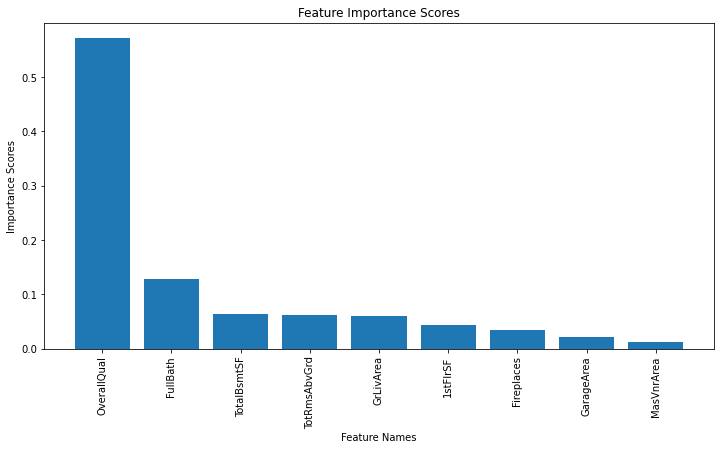

In [203]:
# get the trained model from the pipeline
xgb = model.named_steps['xgbregressor']

# retrieve the feature importance scores from the trained model
importances = xgb.feature_importances_

# create a pandas DataFrame with feature names and their importance scores
features_df = pd.DataFrame({'feature_names': X_train.columns, 'importance_scores': importances})

# sort the DataFrame by the importance scores in descending order
features_df = features_df.sort_values(by='importance_scores', ascending=False)

# plot the feature importance scores
plt.figure(figsize=(12, 6))
plt.bar(features_df['feature_names'], features_df['importance_scores'])
plt.xticks(rotation=90)
plt.xlabel('Feature Names')
plt.ylabel('Importance Scores')
plt.title('Feature Importance Scores')
plt.show()

### Model is overfitting

#### Adding hyper parameters

#### Model 2 - Building XGBRegressor model with highly correlated numerical variables and hyperparamters

In [204]:
param_grid = {'xgbregressor__n_estimators': np.arange(100, 300, 50), 'xgbregressor__max_depth': np.arange(2,5)}

In [205]:
from sklearn.model_selection import GridSearchCV
# Create a GridSearchCV object
model = GridSearchCV(
    estimator=make_pipeline(XGBRegressor()),
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring='neg_mean_squared_error'
)

In [206]:
model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('xgbregressor',
                                        XGBRegressor(base_score=None,
                                                     booster=None,
                                                     callbacks=None,
                                                     colsample_bylevel=None,
                                                     colsample_bynode=None,
                                                     colsample_bytree=None,
                                                     early_stopping_rounds=None,
                                                     enable_categorical=False,
                                                     eval_metric=None,
                                                     feature_types=None,
                                                     gamma=None, gpu_id=None,
                                                     grow_policy=None,
                                     

In [207]:
print(model.best_params_)

{'xgbregressor__max_depth': 2, 'xgbregressor__n_estimators': 150}


In [208]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_train_pred = model.predict(X_train)

r2 = r2_score(y_train,y_train_pred)
print('train R^2: {:.2f}'.format(r2))

#Predicting for Test Dataset
y_val_pred = model.predict(X_val)

#test data R^2 prediction
r2 = r2_score(y_val,y_val_pred)
print('test R^2:  {:.2f}'.format(r2))

train R^2: 0.94
test R^2:  0.82


#### Training accuracy reduced, model is not overfit like before

#### Doing more hyperparameter tuning

#### Model 3 - Adding more hyperparameters

In [209]:
param_grid = {'xgbregressor__n_estimators': np.arange(100, 300, 50), 'xgbregressor__max_depth': np.arange(3,8),
             'xgbregressor__alpha': np.arange(7,10), 'xgbregressor__lambda': np.arange(7,10)}

In [210]:
from sklearn.model_selection import GridSearchCV
# Create a GridSearchCV object
model_4hp = GridSearchCV(
    estimator=make_pipeline(XGBRegressor()),
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring='neg_mean_squared_error'
)

In [211]:
model_4hp.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('xgbregressor',
                                        XGBRegressor(base_score=None,
                                                     booster=None,
                                                     callbacks=None,
                                                     colsample_bylevel=None,
                                                     colsample_bynode=None,
                                                     colsample_bytree=None,
                                                     early_stopping_rounds=None,
                                                     enable_categorical=False,
                                                     eval_metric=None,
                                                     feature_types=None,
                                                     gamma=None, gpu_id=None,
                                                     grow_policy=None,
                                     

In [212]:
print(model_4hp.best_params_)

{'xgbregressor__alpha': 9, 'xgbregressor__lambda': 8, 'xgbregressor__max_depth': 4, 'xgbregressor__n_estimators': 100}


In [213]:
y_train_pred = model_4hp.predict(X_train)

r2 = r2_score(y_train,y_train_pred)
print('train R^2: {:.2f}'.format(r2))

#Predicting for Test Dataset
y_val_pred = model_4hp.predict(X_val)

#test data R^2 prediction
r2 = r2_score(y_val,y_val_pred)
print('test R^2:  {:.2f}'.format(r2))

train R^2: 0.96
test R^2:  0.84


#### Testing accuracy reamins the same while training accuracy improves, indicating model overfitting

#### Trying an ensemble model

#### Model 4 - Lightgbm and Xgboost used together

In [214]:
import lightgbm as lgb
import xgboost as xgb
from sklearn.ensemble import VotingRegressor

lgb_model = lgb.LGBMRegressor(n_estimators=100, max_depth=5, colsample_bytree=0.8, subsample=0.8, reg_alpha=0.1, reg_lambda=0.1, learning_rate=0.05)
xgb_model = xgb.XGBRegressor(n_estimators=100, max_depth=5, colsample_bytree=0.8, subsample=0.8, reg_alpha=0.1, reg_lambda=0.1, learning_rate=0.05)

ensemble = VotingRegressor([('lgb', lgb_model), ('xgb', xgb_model)])

ensemble.fit(X_train, y_train)

VotingRegressor(estimators=[('lgb',
                             LGBMRegressor(colsample_bytree=0.8,
                                           learning_rate=0.05, max_depth=5,
                                           reg_alpha=0.1, reg_lambda=0.1,
                                           subsample=0.8)),
                            ('xgb',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=0.8,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, featu...
                                          gamma=None, gpu_id=None,
                                          grow_policy

In [215]:
y_train_pred = ensemble.predict(X_train)

r2 = r2_score(y_train,y_train_pred)
print('train R^2: {:.2f}'.format(r2))

#Predicting for Test Dataset
y_val_pred = ensemble.predict(X_val)

#test data R^2 prediction
r2 = r2_score(y_val,y_val_pred)
print('test R^2:  {:.2f}'.format(r2))

train R^2: 0.94
test R^2:  0.86


#### Test accuracy improves further

#### Reading test data to make first submission

In [216]:
df_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1458,20,80,11622,5,6,68,11,0,2,2,3,3,1,3,468,2,144,270,882,2,1,896,0,0,896,0,0,1,0,2,1,2,5,0,4,60,1,730,3,3,140,0,0,0,120,0,0,0,6,2010,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1459,20,81,14267,6,6,65,8,108,2,2,3,3,1,5,923,1,0,406,1329,2,1,1329,0,0,1329,0,0,1,1,3,1,3,6,0,4,57,1,312,3,3,393,36,0,0,0,0,0,12500,6,2010,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0

In [217]:
df_test_subset_1 = df_test[['OverallQual', 'GrLivArea', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'MasVnrArea', 'Fireplaces']]

In [218]:
preds_1 = ensemble.predict(df_test_subset_1)

In [219]:
len(df_test_subset_1)

1459

In [220]:
solution = pd.DataFrame({"id":test_ID, "SalePrice":preds_1})
solution.to_csv("submission_1.csv", index = False)  ####0.17026

In [221]:
solution.head(2)

,id,SalePrice
0,1461,131273.202100
1,1462,149702.182551


### The test accuracy didn't improve

In [222]:
df.head(2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65,8450,7,5,110,53,196,3,2,4,3,1,6,706,1,0,150,856,4,1,856,854,0,1710,1,0,2,1,3,1,3,8,0,4,102,2,548,3,3,0,61,0,0,0,0,0,0,2,2008,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,80,9600,6,8,83,26,0,2,2,4,3,5,5,978,1,0,284,1262,4,1,1262,0,0,1262,0,1,2,0,3,1,2,6,1,3,75,2,460,3,3,298,0,0,0,0,0,0,0,5,2007,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

#### Training the model without splitting the data and using all features

In [223]:
X_train = df # assuming 'target_variable' is the column you want to predict
y_train = df_y

#X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [224]:
X_train.isnull().sum().max()

0

In [225]:
import lightgbm as lgb
import xgboost as xgb

model_xgb = xgb.XGBRegressor(n_estimators=2200)

In [226]:
n_folds = 5

In [227]:
model_xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=2200, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [228]:
xgb_train_pred = model_xgb.predict(X_train)

In [229]:
X_train.shape

(1458, 212)

In [230]:
xgb_pred = model_xgb.predict(df_test)

In [231]:
print('Mean Absolute Error {:.2f} '.format(mean_absolute_error(y_train,xgb_train_pred)))
print('Mean Squared Error {:.2f} '.format(mean_squared_error(y_train,xgb_train_pred)))
r2 = r2_score(y_train,xgb_train_pred)
print('R^2: {:.2f}'.format(r2))

Mean Absolute Error 0.05 
Mean Squared Error 0.01 
R^2: 1.00


In [232]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = xgb_pred
sub.to_csv('submission_2.csv',index=False) ###0.14233

#### Rank improved when model is trained with all data, performing hyperparameter tuning

In [233]:
params = {
    'xgb__n_estimators': np.arange(100, 300, 50),
    'xgb__reg_lambda': np.arange(0.1,0.4),
    'xgb__nthread' : np.arange(-2, 3)
}

In [234]:
grid_xgb_1 = GridSearchCV(XGBRegressor(), param_grid=params, cv=3)

In [235]:
grid_xgb_1.fit(X_train, y_train)
xgb_train_pred = grid_xgb_1.predict(X_train)
xgb_pred = grid_xgb_1.predict(df_test)

[16:35:43] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgb__n_estimators", "xgb__nthread", "xgb__reg_lambda" } are not used.

[16:35:43] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgb__n_estimators", "xgb__nthread", "xgb__reg_lambda" } are not used.

[16:35:43] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgb__n_estimators", "xgb__nthread", "xgb__reg_lambda" } are not used.

[16:35:43] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgb__n_estimators", "xgb__nthread", "xgb__reg_lambda" } are not used.

[16:35:44] WARNING: C:/buildkite

[16:35:51] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgb__n_estimators", "xgb__nthread", "xgb__reg_lambda" } are not used.

[16:35:51] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgb__n_estimators", "xgb__nthread", "xgb__reg_lambda" } are not used.

[16:35:51] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgb__n_estimators", "xgb__nthread", "xgb__reg_lambda" } are not used.

[16:35:52] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgb__n_estimators", "xgb__nthread", "xgb__reg_lambda" } are not used.

[16:35:52] WARNING: C:/buildkite

In [236]:
grid_xgb_1.best_params_

{'xgb__n_estimators': 100, 'xgb__nthread': -2, 'xgb__reg_lambda': 0.1}

In [237]:
print('Mean Absolute Error {:.2f} '.format(mean_absolute_error(y_train,xgb_train_pred)))
print('Mean Squared Error {:.2f} '.format(mean_squared_error(y_train,xgb_train_pred)))
r2 = r2_score(y_train,xgb_train_pred)
print('R^2: {:.2f}'.format(r2))

Mean Absolute Error 1474.65 
Mean Squared Error 4270828.60 
R^2: 1.00


In [238]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = xgb_pred
sub.to_csv('submission_3.csv',index=False) ####0.14181 ###the score improved

In [239]:
params = {'xgb__n_estimators': np.arange(100, 500, 50),
    'xgb__min_child_weight':np.arange(1,7), 
          'xgb__gamma':np.arange(0.1,0.7), 
          'xgb__subsample':np.arange(0.8, 1.0),
          'xgb__colsample_bytree':np.arange(0.8,1.0),
          'xgb__max_depth': np.arange(4,10),
          'xgb__reg_lambda':np.arange(0.1,0.7), 
          'xgb__reg_alpha':np.arange(0.1,0.7)}

In [240]:
grid_xgb_2 = GridSearchCV(XGBRegressor(), param_grid=params, cv=3)

In [241]:
grid_xgb_2.fit(X_train, y_train)

[16:35:59] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgb__colsample_bytree", "xgb__gamma", "xgb__max_depth", "xgb__min_child_weight", "xgb__n_estimators", "xgb__reg_alpha", "xgb__reg_lambda", "xgb__subsample" } are not used.

[16:36:00] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgb__colsample_bytree", "xgb__gamma", "xgb__max_depth", "xgb__min_child_weight", "xgb__n_estimators", "xgb__reg_alpha", "xgb__reg_lambda", "xgb__subsample" } are not used.

[16:36:00] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgb__colsample_bytree", "xgb__gamma", "xgb__max_depth", "xgb__min_child_weight", "xgb__n_estimators", "xgb__reg_alpha", "xgb__reg_lambda", "x

[16:36:07] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgb__colsample_bytree", "xgb__gamma", "xgb__max_depth", "xgb__min_child_weight", "xgb__n_estimators", "xgb__reg_alpha", "xgb__reg_lambda", "xgb__subsample" } are not used.

[16:36:08] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgb__colsample_bytree", "xgb__gamma", "xgb__max_depth", "xgb__min_child_weight", "xgb__n_estimators", "xgb__reg_alpha", "xgb__reg_lambda", "xgb__subsample" } are not used.

[16:36:08] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgb__colsample_bytree", "xgb__gamma", "xgb__max_depth", "xgb__min_child_weight", "xgb__n_estimators", "xgb__reg_alpha", "xgb__reg_lambda", "x

[16:36:16] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgb__colsample_bytree", "xgb__gamma", "xgb__max_depth", "xgb__min_child_weight", "xgb__n_estimators", "xgb__reg_alpha", "xgb__reg_lambda", "xgb__subsample" } are not used.

[16:36:16] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgb__colsample_bytree", "xgb__gamma", "xgb__max_depth", "xgb__min_child_weight", "xgb__n_estimators", "xgb__reg_alpha", "xgb__reg_lambda", "xgb__subsample" } are not used.

[16:36:17] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgb__colsample_bytree", "xgb__gamma", "xgb__max_depth", "xgb__min_child_weight", "xgb__n_estimators", "xgb__reg_alpha", "xgb__reg_lambda", "x

[16:36:24] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgb__colsample_bytree", "xgb__gamma", "xgb__max_depth", "xgb__min_child_weight", "xgb__n_estimators", "xgb__reg_alpha", "xgb__reg_lambda", "xgb__subsample" } are not used.

[16:36:24] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgb__colsample_bytree", "xgb__gamma", "xgb__max_depth", "xgb__min_child_weight", "xgb__n_estimators", "xgb__reg_alpha", "xgb__reg_lambda", "xgb__subsample" } are not used.

[16:36:25] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgb__colsample_bytree", "xgb__gamma", "xgb__max_depth", "xgb__min_child_weight", "xgb__n_estimators", "xgb__reg_alpha", "xgb__reg_lambda", "x

[16:36:36] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgb__colsample_bytree", "xgb__gamma", "xgb__max_depth", "xgb__min_child_weight", "xgb__n_estimators", "xgb__reg_alpha", "xgb__reg_lambda", "xgb__subsample" } are not used.

[16:36:37] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgb__colsample_bytree", "xgb__gamma", "xgb__max_depth", "xgb__min_child_weight", "xgb__n_estimators", "xgb__reg_alpha", "xgb__reg_lambda", "xgb__subsample" } are not used.

[16:36:37] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgb__colsample_bytree", "xgb__gamma", "xgb__max_depth", "xgb__min_child_weight", "xgb__n_estimators", "xgb__reg_alpha", "xgb__reg_lambda", "x

[16:36:46] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgb__colsample_bytree", "xgb__gamma", "xgb__max_depth", "xgb__min_child_weight", "xgb__n_estimators", "xgb__reg_alpha", "xgb__reg_lambda", "xgb__subsample" } are not used.

[16:36:47] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgb__colsample_bytree", "xgb__gamma", "xgb__max_depth", "xgb__min_child_weight", "xgb__n_estimators", "xgb__reg_alpha", "xgb__reg_lambda", "xgb__subsample" } are not used.

[16:36:48] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgb__colsample_bytree", "xgb__gamma", "xgb__max_depth", "xgb__min_child_weight", "xgb__n_estimators", "xgb__reg_alpha", "xgb__reg_lambda", "x

[16:39:09] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgb__colsample_bytree", "xgb__gamma", "xgb__max_depth", "xgb__min_child_weight", "xgb__n_estimators", "xgb__reg_alpha", "xgb__reg_lambda", "xgb__subsample" } are not used.

[16:39:10] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgb__colsample_bytree", "xgb__gamma", "xgb__max_depth", "xgb__min_child_weight", "xgb__n_estimators", "xgb__reg_alpha", "xgb__reg_lambda", "xgb__subsample" } are not used.

[16:39:10] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgb__colsample_bytree", "xgb__gamma", "xgb__max_depth", "xgb__min_child_weight", "xgb__n_estimators", "xgb__reg_alpha", "xgb__reg_lambda", "x

[16:39:17] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgb__colsample_bytree", "xgb__gamma", "xgb__max_depth", "xgb__min_child_weight", "xgb__n_estimators", "xgb__reg_alpha", "xgb__reg_lambda", "xgb__subsample" } are not used.

[16:39:17] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgb__colsample_bytree", "xgb__gamma", "xgb__max_depth", "xgb__min_child_weight", "xgb__n_estimators", "xgb__reg_alpha", "xgb__reg_lambda", "xgb__subsample" } are not used.

[16:39:17] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgb__colsample_bytree", "xgb__gamma", "xgb__max_depth", "xgb__min_child_weight", "xgb__n_estimators", "xgb__reg_alpha", "xgb__reg_lambda", "x

[16:39:23] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgb__colsample_bytree", "xgb__gamma", "xgb__max_depth", "xgb__min_child_weight", "xgb__n_estimators", "xgb__reg_alpha", "xgb__reg_lambda", "xgb__subsample" } are not used.

[16:39:23] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgb__colsample_bytree", "xgb__gamma", "xgb__max_depth", "xgb__min_child_weight", "xgb__n_estimators", "xgb__reg_alpha", "xgb__reg_lambda", "xgb__subsample" } are not used.

[16:39:24] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgb__colsample_bytree", "xgb__gamma", "xgb__max_depth", "xgb__min_child_weight", "xgb__n_estimators", "xgb__reg_alpha", "xgb__reg_lambda", "x

[16:39:33] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgb__colsample_bytree", "xgb__gamma", "xgb__max_depth", "xgb__min_child_weight", "xgb__n_estimators", "xgb__reg_alpha", "xgb__reg_lambda", "xgb__subsample" } are not used.

[16:39:33] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgb__colsample_bytree", "xgb__gamma", "xgb__max_depth", "xgb__min_child_weight", "xgb__n_estimators", "xgb__reg_alpha", "xgb__reg_lambda", "xgb__subsample" } are not used.

[16:39:34] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgb__colsample_bytree", "xgb__gamma", "xgb__max_depth", "xgb__min_child_weight", "xgb__n_estimators", "xgb__reg_alpha", "xgb__reg_lambda", "x

[16:39:47] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgb__colsample_bytree", "xgb__gamma", "xgb__max_depth", "xgb__min_child_weight", "xgb__n_estimators", "xgb__reg_alpha", "xgb__reg_lambda", "xgb__subsample" } are not used.

[16:39:47] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgb__colsample_bytree", "xgb__gamma", "xgb__max_depth", "xgb__min_child_weight", "xgb__n_estimators", "xgb__reg_alpha", "xgb__reg_lambda", "xgb__subsample" } are not used.

[16:39:48] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgb__colsample_bytree", "xgb__gamma", "xgb__max_depth", "xgb__min_child_weight", "xgb__n_estimators", "xgb__reg_alpha", "xgb__reg_lambda", "x

[16:40:04] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgb__colsample_bytree", "xgb__gamma", "xgb__max_depth", "xgb__min_child_weight", "xgb__n_estimators", "xgb__reg_alpha", "xgb__reg_lambda", "xgb__subsample" } are not used.

[16:40:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgb__colsample_bytree", "xgb__gamma", "xgb__max_depth", "xgb__min_child_weight", "xgb__n_estimators", "xgb__reg_alpha", "xgb__reg_lambda", "xgb__subsample" } are not used.

[16:40:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgb__colsample_bytree", "xgb__gamma", "xgb__max_depth", "xgb__min_child_weight", "xgb__n_estimators", "xgb__reg_alpha", "xgb__reg_lambda", "x

[16:40:13] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgb__colsample_bytree", "xgb__gamma", "xgb__max_depth", "xgb__min_child_weight", "xgb__n_estimators", "xgb__reg_alpha", "xgb__reg_lambda", "xgb__subsample" } are not used.

[16:40:13] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgb__colsample_bytree", "xgb__gamma", "xgb__max_depth", "xgb__min_child_weight", "xgb__n_estimators", "xgb__reg_alpha", "xgb__reg_lambda", "xgb__subsample" } are not used.

[16:40:13] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgb__colsample_bytree", "xgb__gamma", "xgb__max_depth", "xgb__min_child_weight", "xgb__n_estimators", "xgb__reg_alpha", "xgb__reg_lambda", "x

[16:40:22] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgb__colsample_bytree", "xgb__gamma", "xgb__max_depth", "xgb__min_child_weight", "xgb__n_estimators", "xgb__reg_alpha", "xgb__reg_lambda", "xgb__subsample" } are not used.

[16:40:22] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgb__colsample_bytree", "xgb__gamma", "xgb__max_depth", "xgb__min_child_weight", "xgb__n_estimators", "xgb__reg_alpha", "xgb__reg_lambda", "xgb__subsample" } are not used.

[16:40:22] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgb__colsample_bytree", "xgb__gamma", "xgb__max_depth", "xgb__min_child_weight", "xgb__n_estimators", "xgb__reg_alpha", "xgb__reg_lambda", "x

[16:40:30] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgb__colsample_bytree", "xgb__gamma", "xgb__max_depth", "xgb__min_child_weight", "xgb__n_estimators", "xgb__reg_alpha", "xgb__reg_lambda", "xgb__subsample" } are not used.

[16:40:31] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgb__colsample_bytree", "xgb__gamma", "xgb__max_depth", "xgb__min_child_weight", "xgb__n_estimators", "xgb__reg_alpha", "xgb__reg_lambda", "xgb__subsample" } are not used.

[16:40:31] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgb__colsample_bytree", "xgb__gamma", "xgb__max_depth", "xgb__min_child_weight", "xgb__n_estimators", "xgb__reg_alpha", "xgb__reg_lambda", "x

[16:40:39] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgb__colsample_bytree", "xgb__gamma", "xgb__max_depth", "xgb__min_child_weight", "xgb__n_estimators", "xgb__reg_alpha", "xgb__reg_lambda", "xgb__subsample" } are not used.

[16:40:39] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgb__colsample_bytree", "xgb__gamma", "xgb__max_depth", "xgb__min_child_weight", "xgb__n_estimators", "xgb__reg_alpha", "xgb__reg_lambda", "xgb__subsample" } are not used.

[16:40:39] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgb__colsample_bytree", "xgb__gamma", "xgb__max_depth", "xgb__min_child_weight", "xgb__n_estimators", "xgb__reg_alpha", "xgb__reg_lambda", "x

[16:40:48] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgb__colsample_bytree", "xgb__gamma", "xgb__max_depth", "xgb__min_child_weight", "xgb__n_estimators", "xgb__reg_alpha", "xgb__reg_lambda", "xgb__subsample" } are not used.

[16:40:48] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgb__colsample_bytree", "xgb__gamma", "xgb__max_depth", "xgb__min_child_weight", "xgb__n_estimators", "xgb__reg_alpha", "xgb__reg_lambda", "xgb__subsample" } are not used.

[16:40:49] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgb__colsample_bytree", "xgb__gamma", "xgb__max_depth", "xgb__min_child_weight", "xgb__n_estimators", "xgb__reg_alpha", "xgb__reg_lambda", "x

[16:40:56] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgb__colsample_bytree", "xgb__gamma", "xgb__max_depth", "xgb__min_child_weight", "xgb__n_estimators", "xgb__reg_alpha", "xgb__reg_lambda", "xgb__subsample" } are not used.

[16:40:56] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgb__colsample_bytree", "xgb__gamma", "xgb__max_depth", "xgb__min_child_weight", "xgb__n_estimators", "xgb__reg_alpha", "xgb__reg_lambda", "xgb__subsample" } are not used.

[16:40:57] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgb__colsample_bytree", "xgb__gamma", "xgb__max_depth", "xgb__min_child_weight", "xgb__n_estimators", "xgb__reg_alpha", "xgb__reg_lambda", "x

[16:41:07] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgb__colsample_bytree", "xgb__gamma", "xgb__max_depth", "xgb__min_child_weight", "xgb__n_estimators", "xgb__reg_alpha", "xgb__reg_lambda", "xgb__subsample" } are not used.

[16:41:07] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgb__colsample_bytree", "xgb__gamma", "xgb__max_depth", "xgb__min_child_weight", "xgb__n_estimators", "xgb__reg_alpha", "xgb__reg_lambda", "xgb__subsample" } are not used.

[16:41:08] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgb__colsample_bytree", "xgb__gamma", "xgb__max_depth", "xgb__min_child_weight", "xgb__n_estimators", "xgb__reg_alpha", "xgb__reg_lambda", "x

[16:41:17] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgb__colsample_bytree", "xgb__gamma", "xgb__max_depth", "xgb__min_child_weight", "xgb__n_estimators", "xgb__reg_alpha", "xgb__reg_lambda", "xgb__subsample" } are not used.

[16:41:17] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgb__colsample_bytree", "xgb__gamma", "xgb__max_depth", "xgb__min_child_weight", "xgb__n_estimators", "xgb__reg_alpha", "xgb__reg_lambda", "xgb__subsample" } are not used.

[16:41:17] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgb__colsample_bytree", "xgb__gamma", "xgb__max_depth", "xgb__min_child_weight", "xgb__n_estimators", "xgb__reg_alpha", "xgb__reg_lambda", "x

[16:41:26] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgb__colsample_bytree", "xgb__gamma", "xgb__max_depth", "xgb__min_child_weight", "xgb__n_estimators", "xgb__reg_alpha", "xgb__reg_lambda", "xgb__subsample" } are not used.

[16:41:26] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgb__colsample_bytree", "xgb__gamma", "xgb__max_depth", "xgb__min_child_weight", "xgb__n_estimators", "xgb__reg_alpha", "xgb__reg_lambda", "xgb__subsample" } are not used.

[16:41:27] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgb__colsample_bytree", "xgb__gamma", "xgb__max_depth", "xgb__min_child_weight", "xgb__n_estimators", "xgb__reg_alpha", "xgb__reg_lambda", "x

[16:41:35] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgb__colsample_bytree", "xgb__gamma", "xgb__max_depth", "xgb__min_child_weight", "xgb__n_estimators", "xgb__reg_alpha", "xgb__reg_lambda", "xgb__subsample" } are not used.

[16:41:36] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgb__colsample_bytree", "xgb__gamma", "xgb__max_depth", "xgb__min_child_weight", "xgb__n_estimators", "xgb__reg_alpha", "xgb__reg_lambda", "xgb__subsample" } are not used.

[16:41:36] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgb__colsample_bytree", "xgb__gamma", "xgb__max_depth", "xgb__min_child_weight", "xgb__n_estimators", "xgb__reg_alpha", "xgb__reg_lambda", "x

[16:41:43] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgb__colsample_bytree", "xgb__gamma", "xgb__max_depth", "xgb__min_child_weight", "xgb__n_estimators", "xgb__reg_alpha", "xgb__reg_lambda", "xgb__subsample" } are not used.

[16:41:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgb__colsample_bytree", "xgb__gamma", "xgb__max_depth", "xgb__min_child_weight", "xgb__n_estimators", "xgb__reg_alpha", "xgb__reg_lambda", "xgb__subsample" } are not used.

[16:41:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgb__colsample_bytree", "xgb__gamma", "xgb__max_depth", "xgb__min_child_weight", "xgb__n_estimators", "xgb__reg_alpha", "xgb__reg_lambda", "x

[16:41:53] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgb__colsample_bytree", "xgb__gamma", "xgb__max_depth", "xgb__min_child_weight", "xgb__n_estimators", "xgb__reg_alpha", "xgb__reg_lambda", "xgb__subsample" } are not used.

[16:41:54] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgb__colsample_bytree", "xgb__gamma", "xgb__max_depth", "xgb__min_child_weight", "xgb__n_estimators", "xgb__reg_alpha", "xgb__reg_lambda", "xgb__subsample" } are not used.

[16:41:54] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgb__colsample_bytree", "xgb__gamma", "xgb__max_depth", "xgb__min_child_weight", "xgb__n_estimators", "xgb__reg_alpha", "xgb__reg_lambda", "x

[16:42:01] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgb__colsample_bytree", "xgb__gamma", "xgb__max_depth", "xgb__min_child_weight", "xgb__n_estimators", "xgb__reg_alpha", "xgb__reg_lambda", "xgb__subsample" } are not used.

[16:42:01] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgb__colsample_bytree", "xgb__gamma", "xgb__max_depth", "xgb__min_child_weight", "xgb__n_estimators", "xgb__reg_alpha", "xgb__reg_lambda", "xgb__subsample" } are not used.

[16:42:02] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgb__colsample_bytree", "xgb__gamma", "xgb__max_depth", "xgb__min_child_weight", "xgb__n_estimators", "xgb__reg_alpha", "xgb__reg_lambda", "x

[16:42:11] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgb__colsample_bytree", "xgb__gamma", "xgb__max_depth", "xgb__min_child_weight", "xgb__n_estimators", "xgb__reg_alpha", "xgb__reg_lambda", "xgb__subsample" } are not used.

[16:42:11] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgb__colsample_bytree", "xgb__gamma", "xgb__max_depth", "xgb__min_child_weight", "xgb__n_estimators", "xgb__reg_alpha", "xgb__reg_lambda", "xgb__subsample" } are not used.

[16:42:11] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgb__colsample_bytree", "xgb__gamma", "xgb__max_depth", "xgb__min_child_weight", "xgb__n_estimators", "xgb__reg_alpha", "xgb__reg_lambda", "x

[16:42:18] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgb__colsample_bytree", "xgb__gamma", "xgb__max_depth", "xgb__min_child_weight", "xgb__n_estimators", "xgb__reg_alpha", "xgb__reg_lambda", "xgb__subsample" } are not used.

[16:42:19] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgb__colsample_bytree", "xgb__gamma", "xgb__max_depth", "xgb__min_child_weight", "xgb__n_estimators", "xgb__reg_alpha", "xgb__reg_lambda", "xgb__subsample" } are not used.

[16:42:19] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgb__colsample_bytree", "xgb__gamma", "xgb__max_depth", "xgb__min_child_weight", "xgb__n_estimators", "xgb__reg_alpha", "xgb__reg_lambda", "x

[16:42:28] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgb__colsample_bytree", "xgb__gamma", "xgb__max_depth", "xgb__min_child_weight", "xgb__n_estimators", "xgb__reg_alpha", "xgb__reg_lambda", "xgb__subsample" } are not used.

[16:42:28] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgb__colsample_bytree", "xgb__gamma", "xgb__max_depth", "xgb__min_child_weight", "xgb__n_estimators", "xgb__reg_alpha", "xgb__reg_lambda", "xgb__subsample" } are not used.

[16:42:28] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgb__colsample_bytree", "xgb__gamma", "xgb__max_depth", "xgb__min_child_weight", "xgb__n_estimators", "xgb__reg_alpha", "xgb__reg_lambda", "x

[16:42:36] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgb__colsample_bytree", "xgb__gamma", "xgb__max_depth", "xgb__min_child_weight", "xgb__n_estimators", "xgb__reg_alpha", "xgb__reg_lambda", "xgb__subsample" } are not used.

[16:42:36] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgb__colsample_bytree", "xgb__gamma", "xgb__max_depth", "xgb__min_child_weight", "xgb__n_estimators", "xgb__reg_alpha", "xgb__reg_lambda", "xgb__subsample" } are not used.

[16:42:37] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgb__colsample_bytree", "xgb__gamma", "xgb__max_depth", "xgb__min_child_weight", "xgb__n_estimators", "xgb__reg_alpha", "xgb__reg_lambda", "x

[16:42:46] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgb__colsample_bytree", "xgb__gamma", "xgb__max_depth", "xgb__min_child_weight", "xgb__n_estimators", "xgb__reg_alpha", "xgb__reg_lambda", "xgb__subsample" } are not used.

[16:42:46] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgb__colsample_bytree", "xgb__gamma", "xgb__max_depth", "xgb__min_child_weight", "xgb__n_estimators", "xgb__reg_alpha", "xgb__reg_lambda", "xgb__subsample" } are not used.

[16:42:47] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgb__colsample_bytree", "xgb__gamma", "xgb__max_depth", "xgb__min_child_weight", "xgb__n_estimators", "xgb__reg_alpha", "xgb__reg_lambda", "x

[16:42:55] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgb__colsample_bytree", "xgb__gamma", "xgb__max_depth", "xgb__min_child_weight", "xgb__n_estimators", "xgb__reg_alpha", "xgb__reg_lambda", "xgb__subsample" } are not used.

[16:42:55] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgb__colsample_bytree", "xgb__gamma", "xgb__max_depth", "xgb__min_child_weight", "xgb__n_estimators", "xgb__reg_alpha", "xgb__reg_lambda", "xgb__subsample" } are not used.

[16:42:55] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgb__colsample_bytree", "xgb__gamma", "xgb__max_depth", "xgb__min_child_weight", "xgb__n_estimators", "xgb__reg_alpha", "xgb__reg_lambda", "x

[16:43:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgb__colsample_bytree", "xgb__gamma", "xgb__max_depth", "xgb__min_child_weight", "xgb__n_estimators", "xgb__reg_alpha", "xgb__reg_lambda", "xgb__subsample" } are not used.

[16:43:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgb__colsample_bytree", "xgb__gamma", "xgb__max_depth", "xgb__min_child_weight", "xgb__n_estimators", "xgb__reg_alpha", "xgb__reg_lambda", "xgb__subsample" } are not used.

[16:43:06] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgb__colsample_bytree", "xgb__gamma", "xgb__max_depth", "xgb__min_child_weight", "xgb__n_estimators", "xgb__reg_alpha", "xgb__reg_lambda", "x

[16:43:15] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgb__colsample_bytree", "xgb__gamma", "xgb__max_depth", "xgb__min_child_weight", "xgb__n_estimators", "xgb__reg_alpha", "xgb__reg_lambda", "xgb__subsample" } are not used.

[16:43:15] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgb__colsample_bytree", "xgb__gamma", "xgb__max_depth", "xgb__min_child_weight", "xgb__n_estimators", "xgb__reg_alpha", "xgb__reg_lambda", "xgb__subsample" } are not used.

[16:43:16] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgb__colsample_bytree", "xgb__gamma", "xgb__max_depth", "xgb__min_child_weight", "xgb__n_estimators", "xgb__reg_alpha", "xgb__reg_lambda", "x

[16:43:23] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgb__colsample_bytree", "xgb__gamma", "xgb__max_depth", "xgb__min_child_weight", "xgb__n_estimators", "xgb__reg_alpha", "xgb__reg_lambda", "xgb__subsample" } are not used.

[16:43:24] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgb__colsample_bytree", "xgb__gamma", "xgb__max_depth", "xgb__min_child_weight", "xgb__n_estimators", "xgb__reg_alpha", "xgb__reg_lambda", "xgb__subsample" } are not used.

[16:43:24] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgb__colsample_bytree", "xgb__gamma", "xgb__max_depth", "xgb__min_child_weight", "xgb__n_estimators", "xgb__reg_alpha", "xgb__reg_lambda", "x

[16:43:33] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgb__colsample_bytree", "xgb__gamma", "xgb__max_depth", "xgb__min_child_weight", "xgb__n_estimators", "xgb__reg_alpha", "xgb__reg_lambda", "xgb__subsample" } are not used.

[16:43:33] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgb__colsample_bytree", "xgb__gamma", "xgb__max_depth", "xgb__min_child_weight", "xgb__n_estimators", "xgb__reg_alpha", "xgb__reg_lambda", "xgb__subsample" } are not used.

[16:43:34] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgb__colsample_bytree", "xgb__gamma", "xgb__max_depth", "xgb__min_child_weight", "xgb__n_estimators", "xgb__reg_alpha", "xgb__reg_lambda", "x

[16:43:41] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgb__colsample_bytree", "xgb__gamma", "xgb__max_depth", "xgb__min_child_weight", "xgb__n_estimators", "xgb__reg_alpha", "xgb__reg_lambda", "xgb__subsample" } are not used.

[16:43:42] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgb__colsample_bytree", "xgb__gamma", "xgb__max_depth", "xgb__min_child_weight", "xgb__n_estimators", "xgb__reg_alpha", "xgb__reg_lambda", "xgb__subsample" } are not used.

[16:43:42] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgb__colsample_bytree", "xgb__gamma", "xgb__max_depth", "xgb__min_child_weight", "xgb__n_estimators", "xgb__reg_alpha", "xgb__reg_lambda", "x

[16:43:50] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgb__colsample_bytree", "xgb__gamma", "xgb__max_depth", "xgb__min_child_weight", "xgb__n_estimators", "xgb__reg_alpha", "xgb__reg_lambda", "xgb__subsample" } are not used.



GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'xgb__colsample_bytree': array([0.8]),
                         'xgb__gamma': array([0.1]),
                         

In [242]:
xgb_grid2_train_pred = grid_xgb_2.predict(X_train)
xgb_grid2_pred = grid_xgb_2.predict(df_test)


In [243]:
grid_xgb_2.best_params_

{'xgb__colsample_bytree': 0.8,
 'xgb__gamma': 0.1,
 'xgb__max_depth': 4,
 'xgb__min_child_weight': 1,
 'xgb__n_estimators': 100,
 'xgb__reg_alpha': 0.1,
 'xgb__reg_lambda': 0.1,
 'xgb__subsample': 0.8}

In [244]:
sub_4 = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = xgb_grid2_pred
sub.to_csv('submission_4.csv',index=False) ####2104 ####the rank didn't improve

### Using ensemble model

In [245]:
import lightgbm as lgb
import xgboost as xgb
from sklearn.ensemble import VotingRegressor


lgb_model = lgb.LGBMRegressor(n_estimators=100, max_depth=5, colsample_bytree=0.8, subsample=0.8, reg_alpha=0.1, reg_lambda=0.1, learning_rate=0.05)
xgb_model = xgb.XGBRegressor(n_estimators=100, max_depth=5, colsample_bytree=0.8, subsample=0.8, reg_alpha=0.1, reg_lambda=0.1, learning_rate=0.05)

ensemble_2 = VotingRegressor([('lgb', lgb_model), ('xgb', xgb_model)])

In [246]:
ensemble_2.fit(X_train, y_train)

VotingRegressor(estimators=[('lgb',
                             LGBMRegressor(colsample_bytree=0.8,
                                           learning_rate=0.05, max_depth=5,
                                           reg_alpha=0.1, reg_lambda=0.1,
                                           subsample=0.8)),
                            ('xgb',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=0.8,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, featu...
                                          gamma=None, gpu_id=None,
                                          grow_policy

In [247]:
y_train_pred = ensemble_2.predict(X_train)

r2 = r2_score(y_train,y_train_pred)
print('train R^2: {:.2f}'.format(r2))

train R^2: 0.97


In [248]:
#Predicting for Test Dataset
y_test_pred = ensemble_2.predict(df_test)

In [249]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = y_test_pred
sub.to_csv('submission_4.csv',index=False) ###rank 1314

In [250]:
import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostRegressor
from sklearn.ensemble import VotingRegressor

lgb_2_model = lgb.LGBMRegressor(n_estimators=100, max_depth=5, colsample_bytree=0.8, subsample=0.8, reg_alpha=0.1, reg_lambda=0.1, learning_rate=0.05)
xgb_2_model = xgb.XGBRegressor(n_estimators=100, max_depth=5, colsample_bytree=0.8, subsample=0.8, reg_alpha=0.1, reg_lambda=0.1, learning_rate=0.05)
cat_2_model = CatBoostRegressor(n_estimators=100, max_depth=5, learning_rate=0.05)

ensemble_3 = VotingRegressor([('lgb', lgb_2_model), ('xgb', xgb_2_model), ('cat', cat_2_model)])

In [251]:
ensemble_3.fit(X_train, y_train)

0:	learn: 77097.2506421	total: 140ms	remaining: 13.8s
1:	learn: 74619.8469385	total: 144ms	remaining: 7.07s
2:	learn: 72187.7626735	total: 150ms	remaining: 4.86s
3:	learn: 69968.9116853	total: 157ms	remaining: 3.77s
4:	learn: 67715.8932714	total: 163ms	remaining: 3.09s
5:	learn: 65673.3511774	total: 169ms	remaining: 2.64s
6:	learn: 63815.8523408	total: 175ms	remaining: 2.32s
7:	learn: 62099.6014258	total: 181ms	remaining: 2.08s
8:	learn: 60463.9205588	total: 186ms	remaining: 1.88s
9:	learn: 58683.2462850	total: 191ms	remaining: 1.72s
10:	learn: 57058.6557787	total: 195ms	remaining: 1.57s
11:	learn: 55364.8129426	total: 199ms	remaining: 1.46s
12:	learn: 53826.2096184	total: 203ms	remaining: 1.35s
13:	learn: 52464.2113938	total: 206ms	remaining: 1.27s
14:	learn: 51031.2007460	total: 210ms	remaining: 1.19s
15:	learn: 49681.3953916	total: 214ms	remaining: 1.12s
16:	learn: 48430.7779743	total: 217ms	remaining: 1.06s
17:	learn: 47370.7852043	total: 220ms	remaining: 1s
18:	learn: 46277.135632

VotingRegressor(estimators=[('lgb',
                             LGBMRegressor(colsample_bytree=0.8,
                                           learning_rate=0.05, max_depth=5,
                                           reg_alpha=0.1, reg_lambda=0.1,
                                           subsample=0.8)),
                            ('xgb',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=0.8,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, featu...
                                          interaction_constraints=None,
                                          learni

In [252]:
y_train_pred_e3 = ensemble_3.predict(X_train)

r2 = r2_score(y_train,y_train_pred_e3)
print('train R^2: {:.2f}'.format(r2))

train R^2: 0.96


In [253]:
#Predicting for Test Dataset
y_test_pred_e3 = ensemble_3.predict(df_test)

In [254]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = y_test_pred_e3
sub.to_csv('submission_5.csv',index=False) ###rank 1346 ####adding more ensembled model didn't help

In [255]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV, Lasso
from sklearn.model_selection import cross_val_score

In [256]:
model_ridge = Lasso()

In [257]:
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [258]:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_lasso = [rmse_cv(Lasso(alpha = alpha)).mean() 
            for alpha in alphas]

Text(0, 0.5, 'rmse')

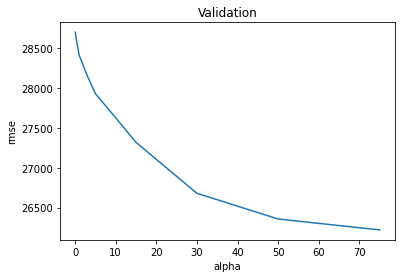

In [259]:
cv_lasso = pd.Series(cv_lasso, index = alphas)
cv_lasso.plot(title = "Validation")
plt.xlabel("alpha")
plt.ylabel("rmse")

In [295]:
model_lasso = LassoCV(alphas = [1, 10, 15, 30]).fit(X_train, y_train)

In [297]:
# retrieve the feature importance scores from the trained model
importances = model_lasso.coef_



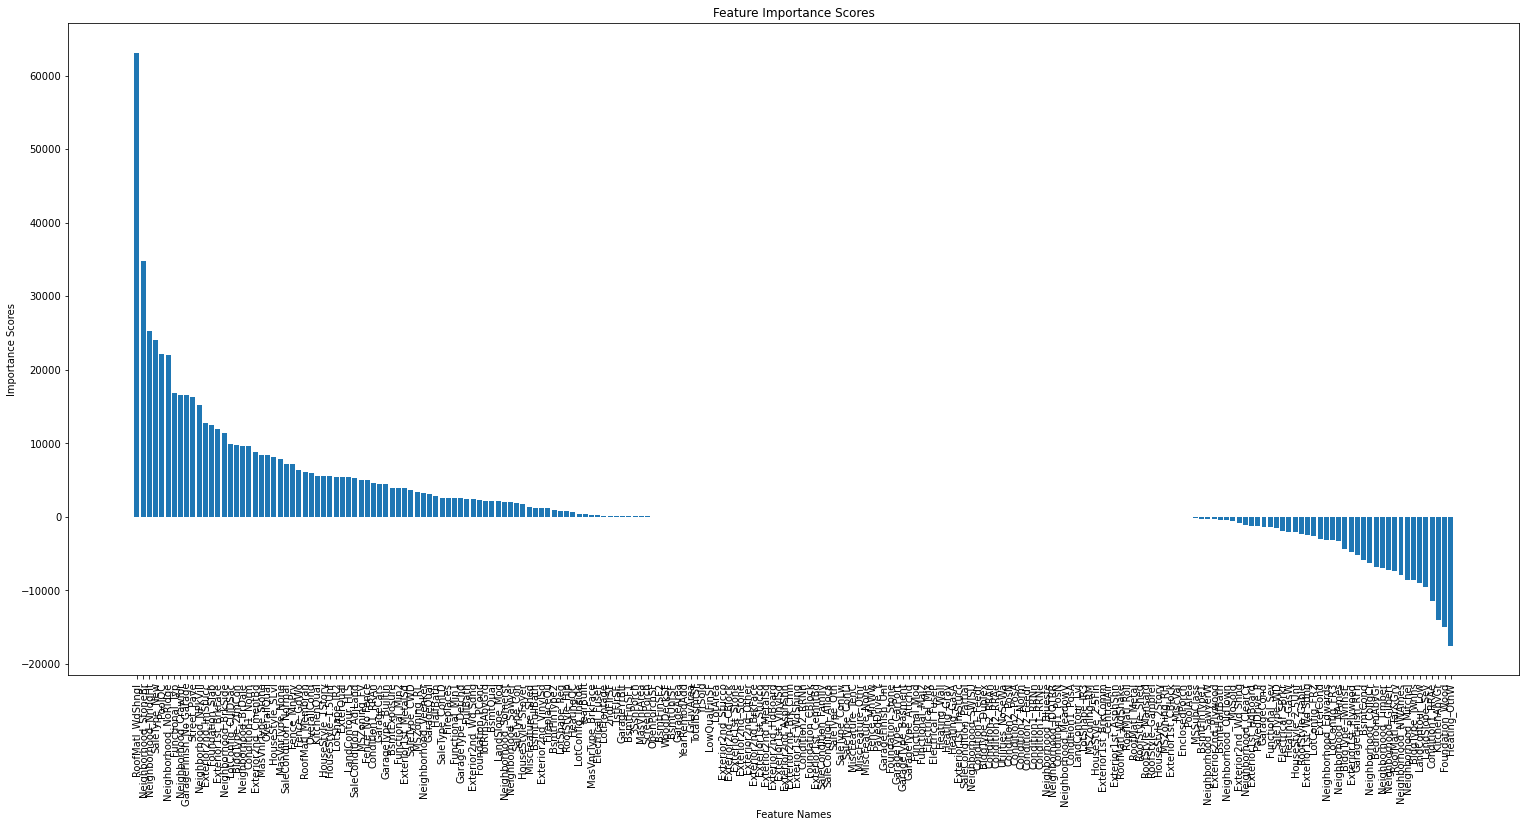

In [303]:
# create a pandas DataFrame with feature names and their importance scores
features_df = pd.DataFrame({'feature_names': X_train.columns, 'importance_scores': importances})

# sort the DataFrame by the importance scores in descending order
features_df = features_df.sort_values(by='importance_scores', ascending=False)

# plot the feature importance scores
plt.figure(figsize=(26, 12))
plt.bar(features_df['feature_names'], features_df['importance_scores'])
plt.xticks(rotation=90)
plt.xlabel('Feature Names')
plt.ylabel('Importance Scores')
plt.title('Feature Importance Scores')
plt.show()

In [261]:
coef = pd.Series(model_lasso.coef_, index = X_train.columns)

In [262]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 139 variables and eliminated the other 73 variables


In [263]:
len(coef[[coef != 0][0].values == True])

139

In [264]:
coef[[coef != 0][0].values == True].index

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond',
       ...
       'Fence_MnPrv', 'Fence_No Fence', 'MiscFeature_Shed', 'SaleType_CWD',
       'SaleType_Con', 'SaleType_ConLD', 'SaleType_New', 'SaleType_WD',
       'SaleCondition_AdjLand', 'SaleCondition_Normal'],
      dtype='object', length=139)

In [265]:
ensemble_preds = ensemble_2.predict(df_test)
lasso_preds = (model_lasso.predict(df_test))

<AxesSubplot:xlabel='ensemble', ylabel='lasso'>

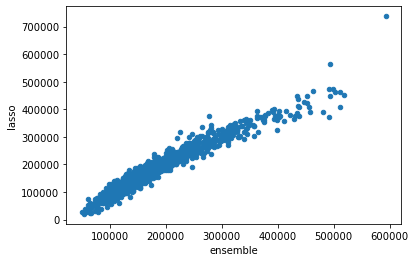

In [266]:
predictions = pd.DataFrame({"ensemble":ensemble_preds, "lasso":lasso_preds})
predictions.plot(x = "ensemble", y = "lasso", kind = "scatter")

In [267]:
preds = 0.3*lasso_preds + 0.7*ensemble_preds

In [268]:
solution = pd.DataFrame({"id":test_ID, "SalePrice":preds})
solution.to_csv("w1.csv", index = False) ####rank 730

### Using coefficients selected by Lasso to check if model improves

In [269]:
coef[[coef != 0][0].values == True].index.tolist()

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'HeatingQC',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Fireplaces',
 'FireplaceQu',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'PoolQC',
 'MiscVal',
 'MoSold',
 'YrSold',
 'MSZoning_FV',
 'MSZoning_RL',
 'Street_Pave',
 'LotShape_IR2',
 'LotShape_Reg',
 'LandContour_HLS',
 'LandContour_Low',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LotConfig_Inside',
 'LandSlope_Mod',
 'LandSlope_Sev',
 'Neighborhood_BrDale',
 'Neighborh

In [270]:
df_suset_fin = df[coef[[coef != 0][0].values == True].index.tolist()]

In [271]:
df_test_fin = df_test[coef[[coef != 0][0].values == True].index.tolist()]

In [272]:
df_suset_fin.head(2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,MSZoning_FV,MSZoning_RL,Street_Pave,LotShape_IR2,LotShape_Reg,LandContour_HLS,LandContour_Low,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Norm,Condition1_RRAe,Condition1_RRAn,BldgType_2fmCon,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Hip,RoofMatl_Membran,RoofMatl_Tar&Grv,RoofMatl_WdShngl,Exterior1st_BrkFace,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Wd Sdng,Exterior2nd_CmentBd,Exterior2nd_ImStucc,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_PConc,Foundation_Slab,Foundation_Wood,Heating_GasW,Heating_OthW,Electrical_FuseF,Electrical_SBrkr,Functional_Min1,Functional_Min2,Functional_Sev,Functional_Typ,GarageType_BuiltIn,GarageType_Detchd,GarageFinish_No Garage,GarageFinish_RFn,PavedDrive_P,Fence_GdWo,Fence_MnPrv,Fence_No Fence,MiscFeature_Shed,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_New,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Normal
0,60,65,8450,7,5,110,53,196,3,2,4,3,1,6,706,1,0,150,856,4,856,854,0,1710,1,0,2,1,3,1,3,8,0,4,102,2,548,3,3,0,61,0,0,0,0,0,0,2,2008,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1
1,20,80,9600,6,8,83,26,0,2,2,4,3,5,5,978,1,0,284,1262,4,1262,0,0,1262,0,1,2,0,3,1,2,6,1,3,75,2,460,3,3,298,0,0,0,0,0,0,0,5,2007,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1


In [273]:
model_xgb = xgb.XGBRegressor(n_estimators=360, max_depth=2, learning_rate=0.1) #the params were tuned using xgb.cv
model_xgb.fit(df_suset_fin, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=360, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [274]:
model_lasso = LassoCV(alphas = [1, 10, 15, 30]).fit(df_suset_fin, y_train)

coef = pd.Series(model_lasso.coef_, index = df_suset_fin.columns)

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 139 variables and eliminated the other 0 variables


In [275]:
xgb_preds = (model_xgb.predict(df_test_fin))
lasso_preds = (model_lasso.predict(df_test_fin))

<AxesSubplot:xlabel='xgb', ylabel='lasso'>

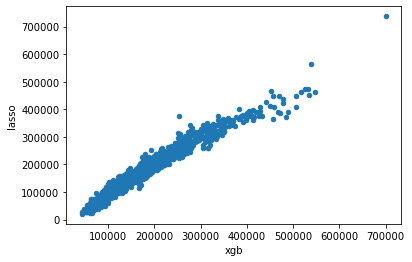

In [276]:
predictions = pd.DataFrame({"xgb":xgb_preds, "lasso":lasso_preds})
predictions.plot(x = "xgb", y = "lasso", kind = "scatter")

In [277]:
preds = 0.3*lasso_preds + 0.7*xgb_preds

In [278]:
solution = pd.DataFrame({"id":test_ID, "SalePrice":preds})
solution.to_csv("w2.csv", index = False) 

In [279]:
import lightgbm as lgb
import xgboost as xgb
from sklearn.ensemble import VotingRegressor


lgb_model = lgb.LGBMRegressor(n_estimators=100, max_depth=5, colsample_bytree=0.8, subsample=0.8, reg_alpha=0.1, reg_lambda=0.1, learning_rate=0.05)
xgb_model = xgb.XGBRegressor(n_estimators=100, max_depth=5, colsample_bytree=0.8, subsample=0.8, reg_alpha=0.1, reg_lambda=0.1, learning_rate=0.05)

ensemble_2 = VotingRegressor([('lgb', lgb_model), ('xgb', xgb_model)])

In [280]:
ensemble_2.fit(df_suset_fin, y_train)

VotingRegressor(estimators=[('lgb',
                             LGBMRegressor(colsample_bytree=0.8,
                                           learning_rate=0.05, max_depth=5,
                                           reg_alpha=0.1, reg_lambda=0.1,
                                           subsample=0.8)),
                            ('xgb',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=0.8,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, featu...
                                          gamma=None, gpu_id=None,
                                          grow_policy

In [281]:
e2 = (ensemble_2.predict(df_test_fin))
lasso_preds = (model_lasso.predict(df_test_fin))

<AxesSubplot:xlabel='e2', ylabel='lasso'>

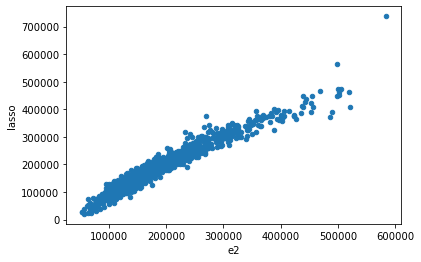

In [282]:
predictions = pd.DataFrame({"e2":e2, "lasso":lasso_preds})
predictions.plot(x = "e2", y = "lasso", kind = "scatter")

In [283]:
preds = 0.4*lasso_preds + 0.6*e2

In [284]:
solution = pd.DataFrame({"id":test_ID, "SalePrice":preds})
solution.to_csv("w3.csv", index = False)

In [285]:
import lightgbm as lgb
import xgboost as xgb
from sklearn.ensemble import VotingRegressor


lgb_model = lgb.LGBMRegressor(n_estimators=100, max_depth=5, colsample_bytree=0.8, subsample=0.8, reg_alpha=0.1, reg_lambda=0.1, learning_rate=0.05)
xgb_model = xgb.XGBRegressor(n_estimators=100, max_depth=5, colsample_bytree=0.8, subsample=0.8, reg_alpha=0.1, reg_lambda=0.1, learning_rate=0.05)

ensemble_2 = VotingRegressor([('lgb', lgb_model), ('xgb', xgb_model)])

ensemble_2.fit(df_suset_fin, y_train)

VotingRegressor(estimators=[('lgb',
                             LGBMRegressor(colsample_bytree=0.8,
                                           learning_rate=0.05, max_depth=5,
                                           reg_alpha=0.1, reg_lambda=0.1,
                                           subsample=0.8)),
                            ('xgb',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=0.8,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, featu...
                                          gamma=None, gpu_id=None,
                                          grow_policy

In [286]:
model_lasso = LassoCV(alphas = [1, 10, 15, 30]).fit(df_suset_fin, y_train)

coef = pd.Series(model_lasso.coef_, index = df_suset_fin.columns)

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 139 variables and eliminated the other 0 variables


In [287]:
model_ridge = RidgeCV(alphas = [1, 10, 15, 30]).fit(df_suset_fin, y_train)

coef = pd.Series(model_ridge.coef_, index = df_suset_fin.columns)

print("Ridge picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Ridge picked 139 variables and eliminated the other 0 variables


In [288]:
e2 = (ensemble_2.predict(df_test_fin))
lasso_preds = (model_lasso.predict(df_test_fin))
ridge_preds = (model_ridge.predict(df_test_fin))

In [289]:
e2_train = (ensemble_2.predict(df_suset_fin))
lasso_preds_train = (model_lasso.predict(df_suset_fin))
ridge_preds_train = (model_ridge.predict(df_suset_fin))

<AxesSubplot:xlabel='sales_price', ylabel='lasso'>

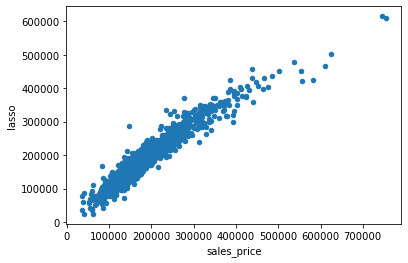

In [290]:
predictions_lasso = pd.DataFrame({"sales_price":y_train, "lasso":lasso_preds_train})
predictions_lasso.plot(x = "sales_price", y = "lasso", kind = "scatter")

<AxesSubplot:xlabel='sales_price', ylabel='ridge'>

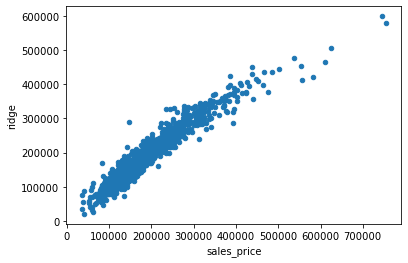

In [291]:
predictions_ridge = pd.DataFrame({"sales_price":y_train, "ridge":ridge_preds_train})
predictions_ridge.plot(x = "sales_price", y = "ridge", kind = "scatter")

<AxesSubplot:xlabel='sales_price', ylabel='e2'>

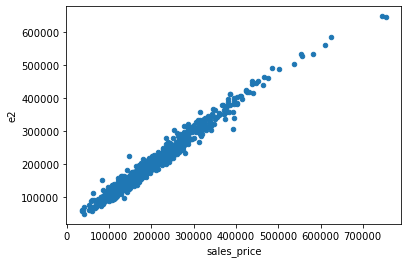

In [292]:
predictions_e2 = pd.DataFrame({"sales_price":y_train, "e2":e2_train})
predictions_e2.plot(x = "sales_price", y = "e2", kind = "scatter")

In [293]:
preds = 0.2*lasso_preds + 0.7*e2 + 0.1*ridge_preds

solution = pd.DataFrame({"id":test_ID, "SalePrice":preds})
solution.to_csv("w4.csv", index = False)

In [294]:
preds = 0.7*lasso_preds + 0.3*xgb_preds

solution = pd.DataFrame({"id":test_ID, "SalePrice":preds})
solution.to_csv("ridge_sol.csv", index = False)

### Performance doesnt improve, so we use the previous model to obtain the best scores